# Introdução

## Importação das bibliotecas necessarias

In [154]:
%matplotlib inline
import requests
import pandas as pd
import os
import json
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import random as random
import numpy as np
import ipywidgets as widgets
import glob, os
sns.set()

## Pegar o CSV do Indicador, Estados e Municípios

Aqui é utilizado o indicador "Proporção de nascidos vivos de mulheres com idade inferior a 20 anos (gestação na adolescência)"

In [155]:
csvs = glob.glob(os.path.join('./csv_files/*.csv'))
df_csvs = pd.DataFrame(csvs,columns=['Indicadores'])

In [156]:
indicadores = df_csvs['Indicadores'].map(lambda x: x.split('/')[2].split('.')[0])
df_indicadores = pd.DataFrame(indicadores,columns=['Indicadores'])
df_indicadores

,Indicadores
0,Q-121-proporcao_nascidos_vivos_com_numero_de_c...
1,QR-29-taxa_fecundidade_20_34
2,QR-30-taxa_fecundidade_35_49
3,Estados
4,Q-18-proporcao_nascimentos_prematuros
5,Q-03-proporcao_nascidos_vivos_mulheres_cor_da_...
6,QR-27-taxa_fecundidade_total
7,Q-16-proporcao_nascidos_vivos_grupo_11_de_robs...
8,Q-122-proporcao_nascidos_vivos_com_numero_de_c...
9,Q-13-proporcao_nascimentos_cesariana


In [157]:
ano_esc = int( input("Diga ano que deseja visualizar: \n") )

Diga ano que deseja visualizar: 
 2016


In [158]:
df_indicadores

,Indicadores
0,Q-121-proporcao_nascidos_vivos_com_numero_de_c...
1,QR-29-taxa_fecundidade_20_34
2,QR-30-taxa_fecundidade_35_49
3,Estados
4,Q-18-proporcao_nascimentos_prematuros
5,Q-03-proporcao_nascidos_vivos_mulheres_cor_da_...
6,QR-27-taxa_fecundidade_total
7,Q-16-proporcao_nascidos_vivos_grupo_11_de_robs...
8,Q-122-proporcao_nascidos_vivos_com_numero_de_c...
9,Q-13-proporcao_nascimentos_cesariana


In [159]:
indicador_select = widgets.Dropdown(
    options=df_indicadores['Indicadores'].values,
    value='W-24-proporcao_obitos_mulher_idade_fertil_investigados',
    description='Indicadores:',
    disabled=False,
)
display(indicador_select)

Dropdown(description='Indicadores:', index=25, options=('Q-121-proporcao_nascidos_vivos_com_numero_de_consulta…

In [160]:
indicador_select.value
nome_arquivo_indicador = indicador_select.value
arquivo_indicador= df_csvs[df_csvs['Indicadores'].str.contains(indicador_select.value)]['Indicadores'].values[0]
print(arquivo_indicador)

./csv_files/Q-122-proporcao_nascidos_vivos_com_numero_de_consultas_prenatal_maior_que_5.csv


In [161]:
df = pd.read_csv(arquivo_indicador)
df_estados = pd.read_csv('./csv_files/Estados.csv')
df_municipios = pd.read_csv('./csv_files/Municipios.csv')
df_pop_fem_10_49 = pd.read_csv('./tabelas_tabnet/mulheres_10_49_por_municipio_limpa.csv', ';')

In [162]:
coluna_codigo = df.columns[0] 
ano =           df.columns[1] 
indicador =     df.columns[2]
total =         df.columns[3]
ratio =         df.columns[4]
print(coluna_codigo,ano,indicador,total,ratio)

CODMUNRES ano_nasc Qtd_Mais_de_5_Consultas_Pre_Natal Qtd_Total Ratio


## Normalização da tabela para sempre haver registro de município e os respectivos anos de 2012 a 2019

In [163]:
years = []
for col in df_pop_fem_10_49:
    if col != 'Municipio':
        years.append(col)

all_entries = []
for index, row in df_pop_fem_10_49.iterrows():
    row_array = row.values.tolist()
    for i in range(len(row_array)):
        if i != 0:
            pop = row_array[i]
            if pop == '-':
                pop = row_array[i+1]
            all_entries.append([row_array[0], years[i-1], int(pop)])

            
df_pop_fem_10_49_by_codmunres = pd.DataFrame(all_entries, columns=[coluna_codigo, ano, 'Pop'])
del df_pop_fem_10_49_by_codmunres['Pop']

# do a right join
df_pop_fem_10_49_by_codmunres[coluna_codigo] = df_pop_fem_10_49_by_codmunres[coluna_codigo].astype(str)
df_pop_fem_10_49_by_codmunres[ano] = df_pop_fem_10_49_by_codmunres[ano].astype(str)
df[coluna_codigo] = df[coluna_codigo].astype(str)
df[ano] = df[ano].astype(str)
df_merge = pd.merge(df, df_pop_fem_10_49_by_codmunres, on=[coluna_codigo,ano], how='right')
df_merge = df_merge.fillna(0)
df = df_merge
df[ano] = df[ano].astype(int)
df[coluna_codigo] = df[coluna_codigo].astype(int)

df


,CODMUNRES,ano_nasc,Qtd_Mais_de_5_Consultas_Pre_Natal,Qtd_Total,Ratio
0,110001,2012,306.0,386.0,0.792746
1,110001,2013,0.0,382.0,0.000000
2,110001,2014,278.0,341.0,0.815249
3,110001,2015,297.0,373.0,0.796247
4,110001,2016,269.0,326.0,0.825153
...,...,...,...,...,...
44555,530010,2015,37575.0,46122.0,0.814687
44556,530010,2016,35817.0,43340.0,0.826419
44557,530010,2017,36885.0,44568.0,0.827612
44558,530010,2018,36997.0,44195.0,0.837131


In [164]:
df_municipios[coluna_codigo] = df_municipios[coluna_codigo].astype(str)
f2d = df_municipios[coluna_codigo].str.extract('([0-9]{2})', expand=False)
df_municipios['COD_UF'] = f2d.astype(int)
df_municipios

,res_MUNNOME,CODMUNRES,COD_UF
0,Município ignorado - RO,110000,11
1,Alta Floresta D'Oeste,110001,11
2,Ariquemes,110002,11
3,Cabixi,110003,11
4,Cacoal,110004,11
...,...,...,...
5579,Vianópolis,522200,52
5580,Vicentinópolis,522205,52
5581,Vila Boa,522220,52
5582,Vila Propício,522230,52


In [165]:
estados_select = widgets.Dropdown(
    options=df_estados['res_NOME_UF'].values,
    value='MINAS GERAIS',
    description='Estados:',
    disabled=False,
)
display(estados_select)

Dropdown(description='Estados:', index=16, options=('RONDONIA', 'ACRE', 'AMAZONAS', 'RORAIMA', 'PARA', 'AMAPA'…

In [166]:
nome_estado = estados_select.value
print(int(df.drop_duplicates(subset=[coluna_codigo]).shape[0]),'Municípios registrados no país')

5570 Municípios registrados no país


In [167]:
anos = [2012,2013,2014,2015,2016,2017,2018,2019]
print(anos)

for i in anos:
    aux = df[df[ano]==i]
    aux1 = aux[aux[total]<100]
    print('Ano: ',i,' Municipios com menos de 100 registros no total: ', aux1.shape[0])

[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
Ano:  2012  Municipios com menos de 100 registros no total:  2116
Ano:  2013  Municipios com menos de 100 registros no total:  2162
Ano:  2014  Municipios com menos de 100 registros no total:  2106
Ano:  2015  Municipios com menos de 100 registros no total:  2119
Ano:  2016  Municipios com menos de 100 registros no total:  2194
Ano:  2017  Municipios com menos de 100 registros no total:  2138
Ano:  2018  Municipios com menos de 100 registros no total:  2120
Ano:  2019  Municipios com menos de 100 registros no total:  2160


In [168]:
uf_selecionada = df_estados[df_estados['res_NOME_UF']==estados_select.value]['COD_UF'].values[0]
municipios_uf = df_municipios[df_municipios['COD_UF'] == uf_selecionada]
novo_municipios_uf = df_municipios[df_municipios['COD_UF'] == uf_selecionada]

municipios_select = widgets.Dropdown(
    options=municipios_uf['res_MUNNOME'].values,
    value=municipios_uf['res_MUNNOME'].values[0],
    description='Municipio:',
    disabled=False,
)

subset_nao_ignorado = df[df[coluna_codigo]%10000 != 0]

df1 = municipios_uf
df2 = subset_nao_ignorado

df1 = df1.astype({coluna_codigo: int})
result = pd.merge(df2, df1 ,on=[coluna_codigo])

uf_selecionada = df_estados[df_estados['res_NOME_UF']==estados_select.value]['COD_UF'].values[0]
result = result[result['COD_UF'] == uf_selecionada]

droped_duplicates = result.drop_duplicates(subset=['res_MUNNOME'])

municipios_select = widgets.Dropdown(
    options=droped_duplicates['res_MUNNOME'].values,
    value=droped_duplicates['res_MUNNOME'].values[0],
    description='Municipio:',
    disabled=False,
)

display(municipios_select)

Dropdown(description='Municipio:', options=('Angra dos Reis', 'Aperibé', 'Araruama', 'Areal', 'Armação dos Búz…

In [169]:
cod_municipio  = municipios_uf[municipios_uf['res_MUNNOME'] == municipios_select.value][coluna_codigo].values[0]
cod_estado = int(str(cod_municipio)[:2])
nome_municipio = municipios_select.value

cod_municipio

'330455'

In [170]:
subset_mun = subset_nao_ignorado[subset_nao_ignorado[coluna_codigo] == int( cod_municipio )]
subset_mun.head(10)

,CODMUNRES,ano_nasc,Qtd_Mais_de_5_Consultas_Pre_Natal,Qtd_Total,Ratio
25936,330455,2012,69273.0,86549.0,0.800391
25937,330455,2013,0.0,87661.0,0.000000
25938,330455,2014,75059.0,89991.0,0.834072
25939,330455,2015,76545.0,90694.0,0.843992
25940,330455,2016,71517.0,83166.0,0.859931
25941,330455,2017,74678.0,84521.0,0.883544
25942,330455,2018,73639.0,82554.0,0.892010
25943,330455,2019,68122.0,76803.0,0.886971


In [171]:
nome_arquivo_indicador

'Q-122-proporcao_nascidos_vivos_com_numero_de_consultas_prenatal_maior_que_5'

In [172]:
nome_indicador = nome_arquivo_indicador.split('-')[2].replace('_',' ').upper()
print(nome_indicador)

PROPORCAO NASCIDOS VIVOS COM NUMERO DE CONSULTAS PRENATAL MAIOR QUE 5


## Gráficos por município

### Plot em Stacked Bar do município escolhido considerando os valores absolutos

Aqui são plotadas as barras de Quantidade do Indicador e Quantidade Fora do Indicador, o que permite visualizar os valores absolutos para cada ano no município escolhido.

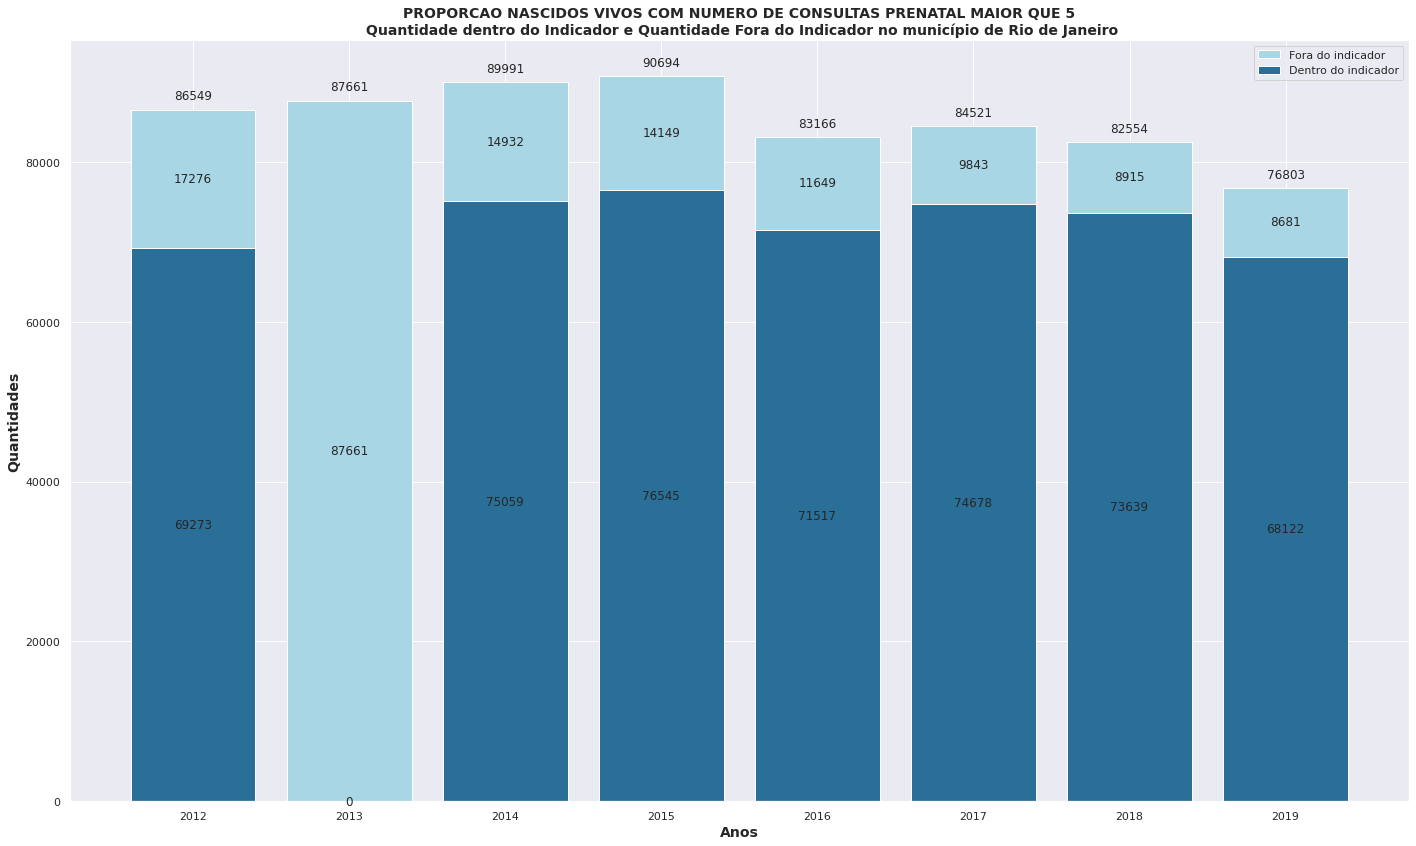

In [173]:
fig, ax = plt.subplots(figsize=(24, 14))

p1=ax.bar( subset_mun[ano], subset_mun[total] - subset_mun[indicador], bottom=subset_mun[indicador], color ='#a9d6e5', label = 'Fora do indicador')
p2=ax.bar( subset_mun[ano], subset_mun[indicador], color ='#2a6f97', label = 'Dentro do indicador')

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 14}

plt.title(nome_indicador+ "\n Quantidade dentro do Indicador e Quantidade Fora do Indicador no município de "+nome_municipio,**font)
plt.xlabel('Anos',**font)
plt.ylabel('Quantidades',**font)

for i in range(8):
    height = int(p1[i].get_height() + p2[i].get_height())
    plt.text(p1[i].get_x() + p1[i].get_width()/2., 1.01*height,  round(height, 2), ha='center', va='bottom')

ax.bar_label(p1,label_type="center")
ax.bar_label(p2,label_type="center")
ax.legend()
plt.show()

In [174]:
subset_mun.head()

,CODMUNRES,ano_nasc,Qtd_Mais_de_5_Consultas_Pre_Natal,Qtd_Total,Ratio
25936,330455,2012,69273.0,86549.0,0.800391
25937,330455,2013,0.0,87661.0,0.000000
25938,330455,2014,75059.0,89991.0,0.834072
25939,330455,2015,76545.0,90694.0,0.843992
25940,330455,2016,71517.0,83166.0,0.859931


### Plot em Stacked Bar do município escolhido considerando as proporções

Aqui são plotadas as barras de Proporção dentro do Indicador e Proporção Fora do Indicador, o que permite visualizar a proporção para cada ano no município escolhido.

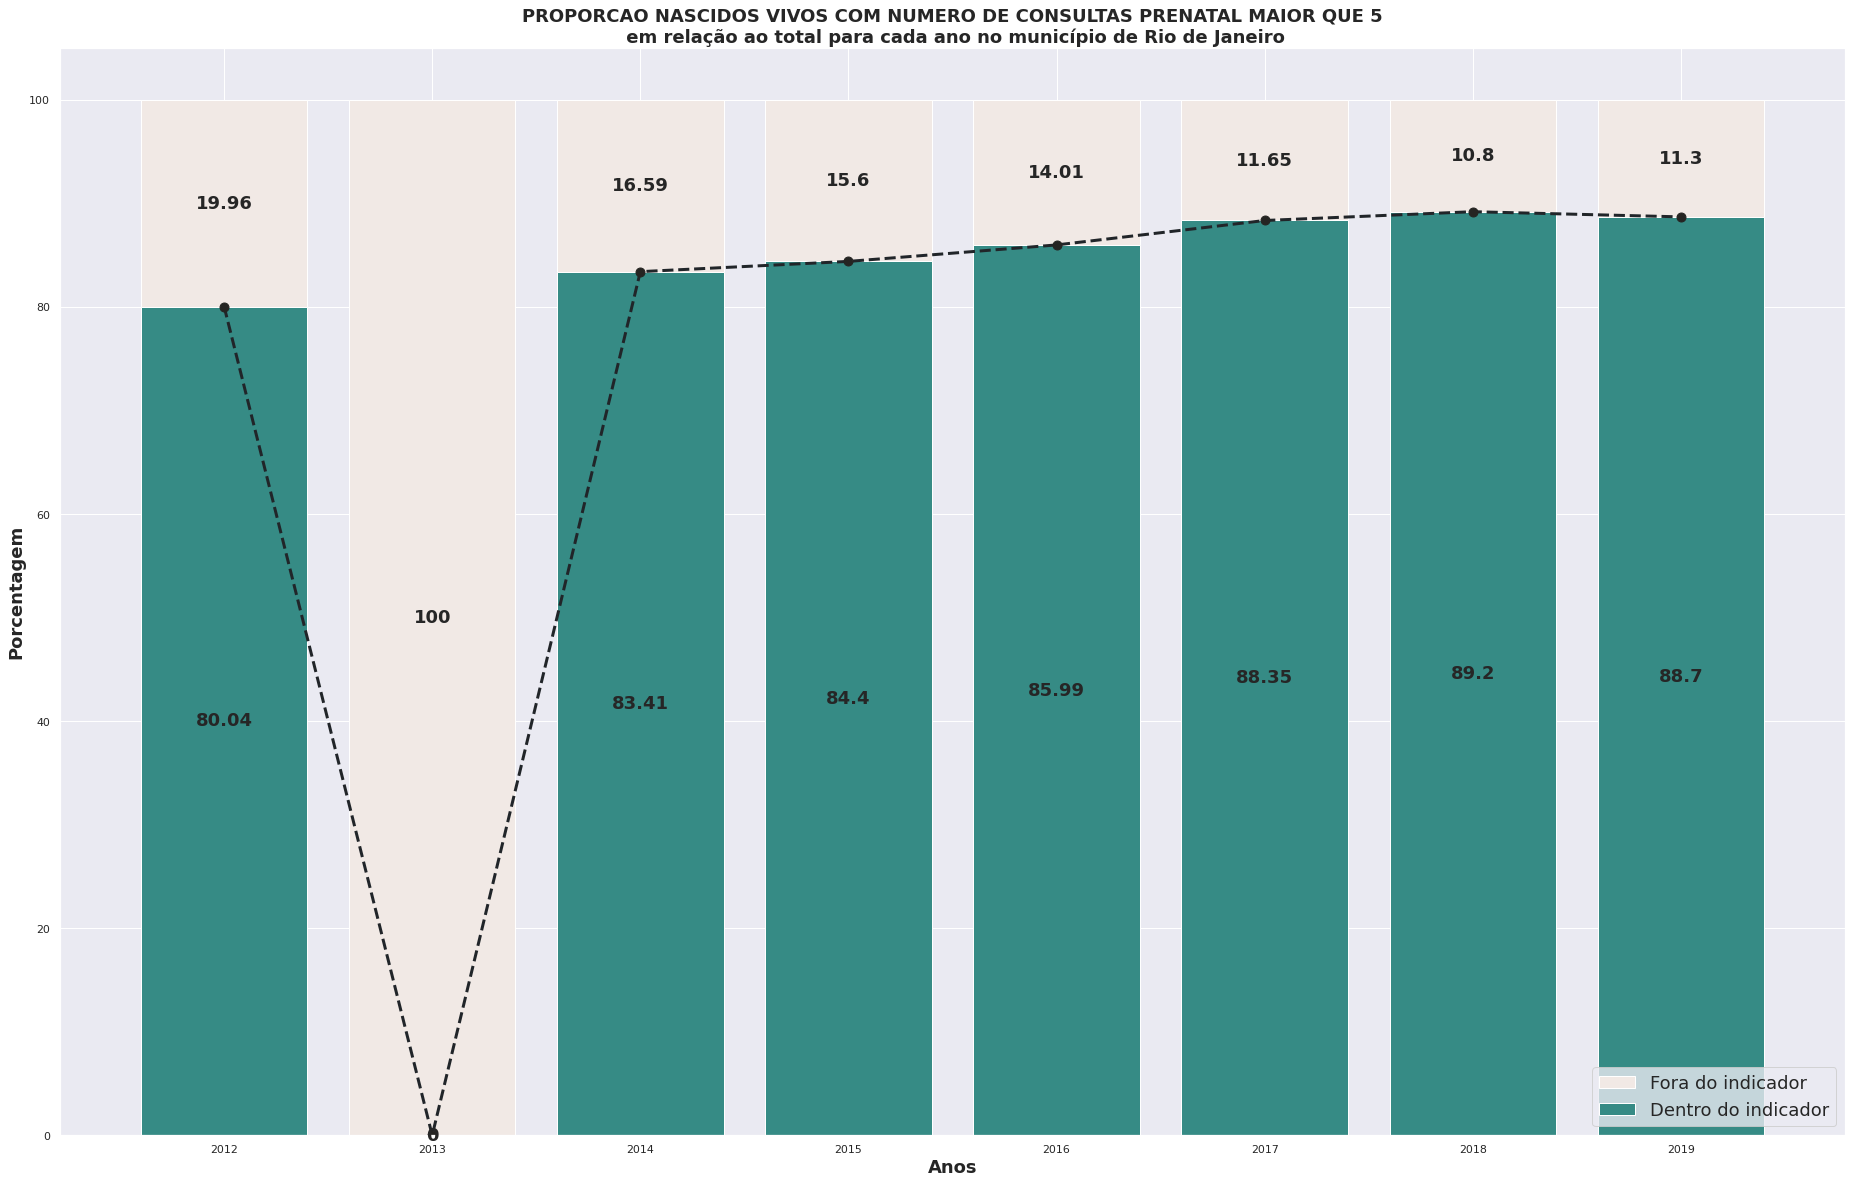

In [175]:
# Falta mostrar dentro desse gráfico a média Estadual, Regional e Brasil em cada ano 

fig, ax = plt.subplots(figsize=(32, 20))

plt.plot(subset_mun[ano], np.round(100*subset_mun[ratio], decimals=2),'.--',markersize=18,mec='#252422',mfc='#252422',linewidth=3,color='#212529' )

p1 = ax.bar(subset_mun[ano],  np.round(100 - 100*subset_mun[ratio], decimals=2) , bottom= np.round(100*subset_mun[ratio], decimals=2), color ='#F1E9E5', label = 'Fora do indicador')
p2 = ax.bar(subset_mun[ano],  np.round(100*subset_mun[ratio], decimals=2), color ='#368B85', label = 'Dentro do indicador' )

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.title(nome_indicador + "\n em relação ao total para cada ano no município de " + nome_municipio, **font)
plt.xlabel('Anos',**font)
plt.ylabel('Porcentagem',**font)
'''
if(subset_mun[total].mean()<100):
    plt.text(0.03, 1.1, 'Esse município possui em média menos de 100 registros em cada ano', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
'''
ax.bar_label(p1,label_type="center",**font)
ax.bar_label(p2,label_type="center",**font)
ax.legend(loc='lower right', fontsize = 18 )

plt.savefig('./Imagens/10-grafico1', bbox_inches='tight')
plt.show()

### Plot em Stacked Bar do estado que o município escolhido pertence considerando as proporções

Aqui serão calculadas os números acumulados de registros em relação a estado e país para cada ano, para que depois possam ser analisadas as proporções. Essa célula pode ser necessária antes, visto que precisamos mostrar tanto o quartil que o estado se encontra em relação ao país, quanto o quartil que um município em específico de encontra em relação ao estado.

In [110]:
subset_nao_ignorado = subset_nao_ignorado.astype({coluna_codigo: str})
subset_nao_ignorado[ano] =       subset_nao_ignorado[ano].astype(int)
subset_nao_ignorado[indicador] = subset_nao_ignorado[indicador].astype(int)
subset_nao_ignorado[total] =     subset_nao_ignorado[total].astype(int)

f2d = subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{2})', expand=False)
df_grouped_by_state = subset_nao_ignorado.groupby([f2d, ano], as_index=True).agg({indicador:'sum', total:'sum'})
df_grouped_by_state.reset_index(inplace=True)
df_grouped_by_state.rename(columns = {coluna_codigo:'COD_UF'}, inplace = True)
df_grouped_by_state[ratio] = df_grouped_by_state[indicador]/df_grouped_by_state[total]
df_grouped_by_state['COD_UF'] = df_grouped_by_state['COD_UF'].astype(int)

numero_municipios_estado = int(droped_duplicates['res_MUNNOME'].shape[0])

df_estado_acumulado = df_grouped_by_state[df_grouped_by_state['COD_UF']==cod_estado]

print(numero_municipios_estado, 'Municípios com mais de 100 registros no estado',nome_estado,'para o indicador',nome_indicador,'\n')
print(df_estado_acumulado)

92 Municípios com mais de 100 registros no estado RIO DE JANEIRO para o indicador PROPORCAO NASCIDOS VIVOS COM NUMERO DE CONSULTAS PRENATAL MAIOR QUE 7 

     COD_UF  ano_nasc  Qtd_Mais_de_7_Consultas_Pre_Natal  Qtd_Total     Ratio
144      33      2012                             114298     222837  0.512922
145      33      2013                                  0     224008  0.000000
146      33      2014                             128170     233569  0.548746
147      33      2015                             132717     236946  0.560115
148      33      2016                             127313     219124  0.581009
149      33      2017                             135307     223216  0.606171
150      33      2018                             138198     220481  0.626802
151      33      2019                             131034     207966  0.630074


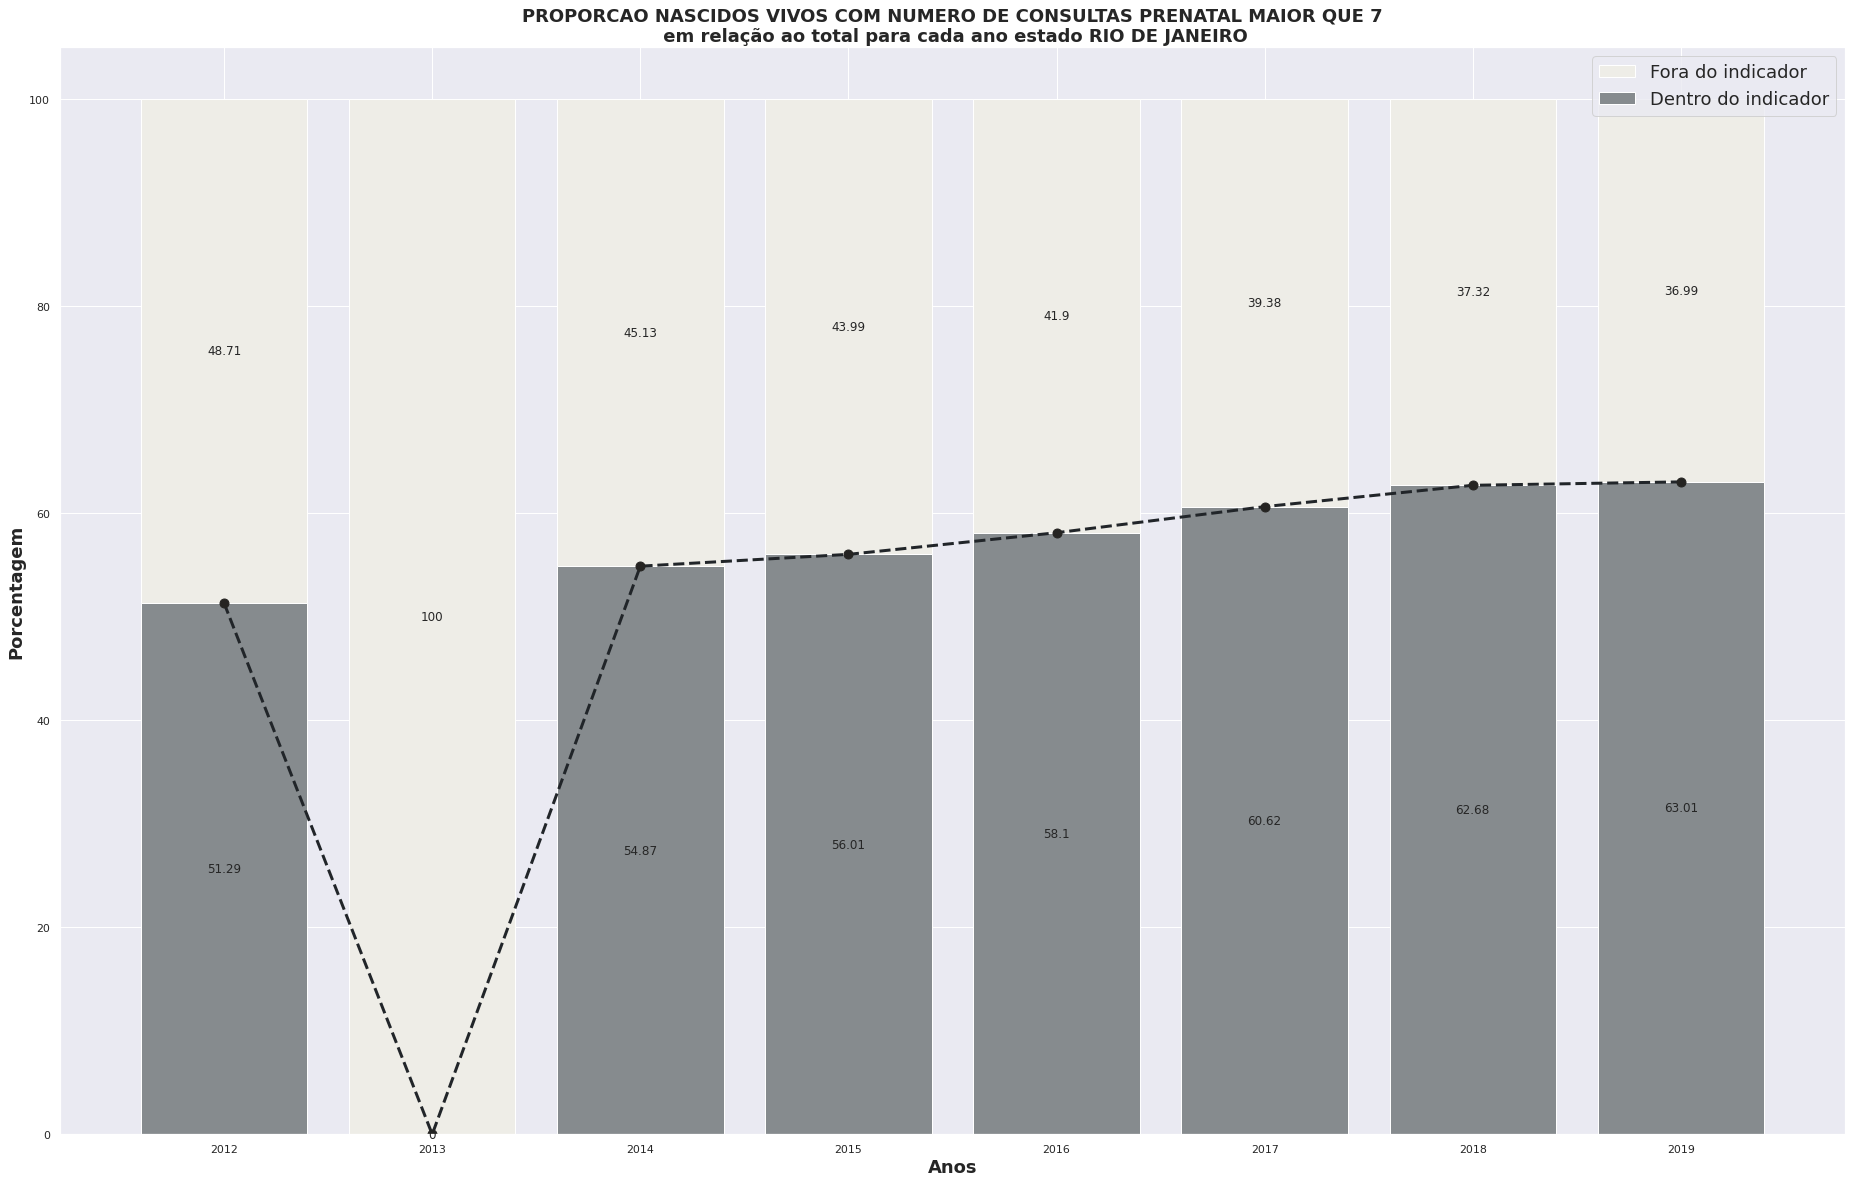

In [111]:
# Falta mostrar dentro desse gráfico a média Regional e Brasil em cada ano 

fig, ax = plt.subplots(figsize=(32, 20))

plt.plot(df_estado_acumulado[ano], np.round(100*df_estado_acumulado[ratio], decimals=2),'.--',markersize=18,mec='#252422',mfc='#252422',linewidth=3,color='#212529' )

p1 = ax.bar(df_estado_acumulado[ano],  np.round(100 - 100*df_estado_acumulado[ratio], decimals=2) , bottom= np.round(100*df_estado_acumulado[ratio], decimals=2), color ='#EEEDE7', label = 'Fora do indicador')
p2 = ax.bar(df_estado_acumulado[ano],  np.round(100*df_estado_acumulado[ratio], decimals=2), color ='#868B8E', label = 'Dentro do indicador' )

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.title(nome_indicador + "\n em relação ao total para cada ano estado " + nome_estado, **font)
plt.xlabel('Anos',**font)
plt.ylabel('Porcentagem',**font)

ax.bar_label(p1,label_type="center")
ax.bar_label(p2,label_type="center")
ax.legend(loc='upper right', fontsize = 18 )
plt.savefig('./Imagens/10-grafico2', bbox_inches='tight')
plt.show()

### Plot em Stacked Bar da região que o município escolhido pertence considerando as proporções

In [112]:
norte =         subset_nao_ignorado.loc[(subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{1})', expand=False) == '1') ]
nordeste =      subset_nao_ignorado.loc[(subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{1})', expand=False) == '2') ]
sudeste =       subset_nao_ignorado.loc[(subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{1})', expand=False) == '3') ]
sul =           subset_nao_ignorado.loc[(subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{1})', expand=False) == '4') ]
centro_oeste =  subset_nao_ignorado.loc[(subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{1})', expand=False) == '5') ]

print(sudeste)
sudeste.to_csv('./csv_files/37-sudeste.csv',index=False)

      CODMUNRES  ano_nasc  Qtd_Mais_de_7_Consultas_Pre_Natal  Qtd_Total  \
17952    310010      2012                                 34         68   
17953    310010      2013                                  0         57   
17954    310010      2014                                 43         71   
17955    310010      2015                                 22         53   
17956    310010      2016                                 32         59   
...         ...       ...                                ...        ...   
31291    355715      2015                                 22         33   
31292    355715      2016                                 20         28   
31293    355715      2017                                 13         24   
31294    355715      2018                                 20         25   
31295    355715      2019                                 16         25   

          Ratio  
17952  0.500000  
17953  0.000000  
17954  0.605634  
17955  0.415094  
17956  0.

In [113]:
def acumula(dataframe):
    anos = np.array(dataframe[ano][:8]).astype(int)

    soma_anos_total = np.zeros(8).astype(int)
    for i in range(8):
        soma_anos_total[i] = dataframe.loc[dataframe[ano]==anos[i], total ].sum()

    soma_anos_indicador = np.zeros(8).astype(int)
    for i in range(8):
        soma_anos_indicador[i] = dataframe.loc[dataframe[ano]==anos[i], indicador ].sum()

    list_of_tuples = list(zip(anos,soma_anos_indicador, soma_anos_total, np.round(soma_anos_indicador/soma_anos_total,4)))
    acumulado = pd.DataFrame(list_of_tuples,columns=[ano,indicador,total,ratio])
    
    return acumulado

In [114]:
norte_acumulado = acumula(norte)
#norte_acumulado.insert(loc=0,column='CODREGIAO',value=[1,1,1,1,1,1,1,1])
norte_acumulado.insert(loc=0,column='NOMEREGIAO',value='Norte')

nordeste_acumulado = acumula(nordeste)
#nordeste_acumulado.insert(loc=0,column='CODREGIAO',value=[2,2,2,2,2,2,2,2])
nordeste_acumulado.insert(loc=0,column='NOMEREGIAO',value='Nordeste')

sudeste_acumulado = acumula(sudeste)
#sudeste_acumulado.insert(loc=0,column='CODREGIAO',value=[3,3,3,3,3,3,3,3])
sudeste_acumulado.insert(loc=0,column='NOMEREGIAO',value='Sudeste')


sul_acumulado = acumula(sul)
#sul_acumulado.insert(loc=0,column='CODREGIAO',value=[4,4,4,4,4,4,4,4])
sul_acumulado.insert(loc=0,column='NOMEREGIAO',value='Sul')


centro_oeste_acumulado = acumula(centro_oeste)
#centro_oeste_acumulado.insert(loc=0,column='CODREGIAO',value=[5,5,5,5,5,5,5,5])
centro_oeste_acumulado.insert(loc=0,column='NOMEREGIAO',value='Centro Oeste')


print(sudeste_acumulado)
print('\n',sul_acumulado)
print('\n',centro_oeste_acumulado)
print('\n',nordeste_acumulado)
print('\n',norte_acumulado)

  NOMEREGIAO  ano_nasc  Qtd_Mais_de_7_Consultas_Pre_Natal  Qtd_Total   Ratio
0    Sudeste      2012                             639330    1152791  0.5546
1    Sudeste      2013                                  0    1147576  0.0000
2    Sudeste      2014                             721342    1182913  0.6098
3    Sudeste      2015                             739902    1196195  0.6185
4    Sudeste      2016                             715657    1127473  0.6347
5    Sudeste      2017                             753043    1151817  0.6538
6    Sudeste      2018                             760826    1146980  0.6633
7    Sudeste      2019                             743333    1102964  0.6739

   NOMEREGIAO  ano_nasc  Qtd_Mais_de_7_Consultas_Pre_Natal  Qtd_Total   Ratio
0        Sul      2012                             225048     381658  0.5897
1        Sul      2013                                  0     386978  0.0000
2        Sul      2014                             250398     396460  0.63

In [115]:
df_brasil_regiao = norte_acumulado.append(nordeste_acumulado).append(sudeste_acumulado).append(sul_acumulado).append(centro_oeste_acumulado)
df_brasil_regiao

,NOMEREGIAO,ano_nasc,Qtd_Mais_de_7_Consultas_Pre_Natal,Qtd_Total,Ratio
0,Norte,2012,87017,308353,0.2822
1,Norte,2013,0,313216,0.0000
2,Norte,2014,100341,321641,0.3120
3,Norte,2015,106325,320890,0.3313
4,Norte,2016,105764,307495,0.3440
5,Norte,2017,111891,312660,0.3579
6,Norte,2018,118745,319199,0.3720
7,Norte,2019,124928,313678,0.3983
0,Nordeste,2012,281901,832606,0.3386
1,Nordeste,2013,0,821427,0.0000


In [116]:
cod_aux = str(subset_mun[coluna_codigo].iloc[0])[:1]

if (cod_aux == '1'):
    nome_regiao = 'Norte'
    regiao = norte
    regiao_acumulada = norte_acumulado
elif (cod_aux == '2'):
    nome_regiao = 'Nordeste'
    regiao = nordeste
    regiao_acumulada = nordeste_acumulado
elif (cod_aux == '3'):
    nome_regiao = 'Sudeste'
    regiao = sudeste
    regiao_acumulada = sudeste_acumulado
elif (cod_aux == '4'):
    nome_regiao = 'Sul'
    regiao = sul
    regiao_acumulada = sul_acumulado
elif (cod_aux == '5'):
    nome_regiao = 'Centro Oeste'
    regiao = centro_oeste
    regiao_acumulada = centro_oeste_acumulado
    
print(nome_regiao)
print(regiao)

Sudeste
      CODMUNRES  ano_nasc  Qtd_Mais_de_7_Consultas_Pre_Natal  Qtd_Total  \
17952    310010      2012                                 34         68   
17953    310010      2013                                  0         57   
17954    310010      2014                                 43         71   
17955    310010      2015                                 22         53   
17956    310010      2016                                 32         59   
...         ...       ...                                ...        ...   
31291    355715      2015                                 22         33   
31292    355715      2016                                 20         28   
31293    355715      2017                                 13         24   
31294    355715      2018                                 20         25   
31295    355715      2019                                 16         25   

          Ratio  
17952  0.500000  
17953  0.000000  
17954  0.605634  
17955  0.415094  
1

In [117]:
regiao_acumulada[ano]

0    2012
1    2013
2    2014
3    2015
4    2016
5    2017
6    2018
7    2019
Name: ano_nasc, dtype: int64

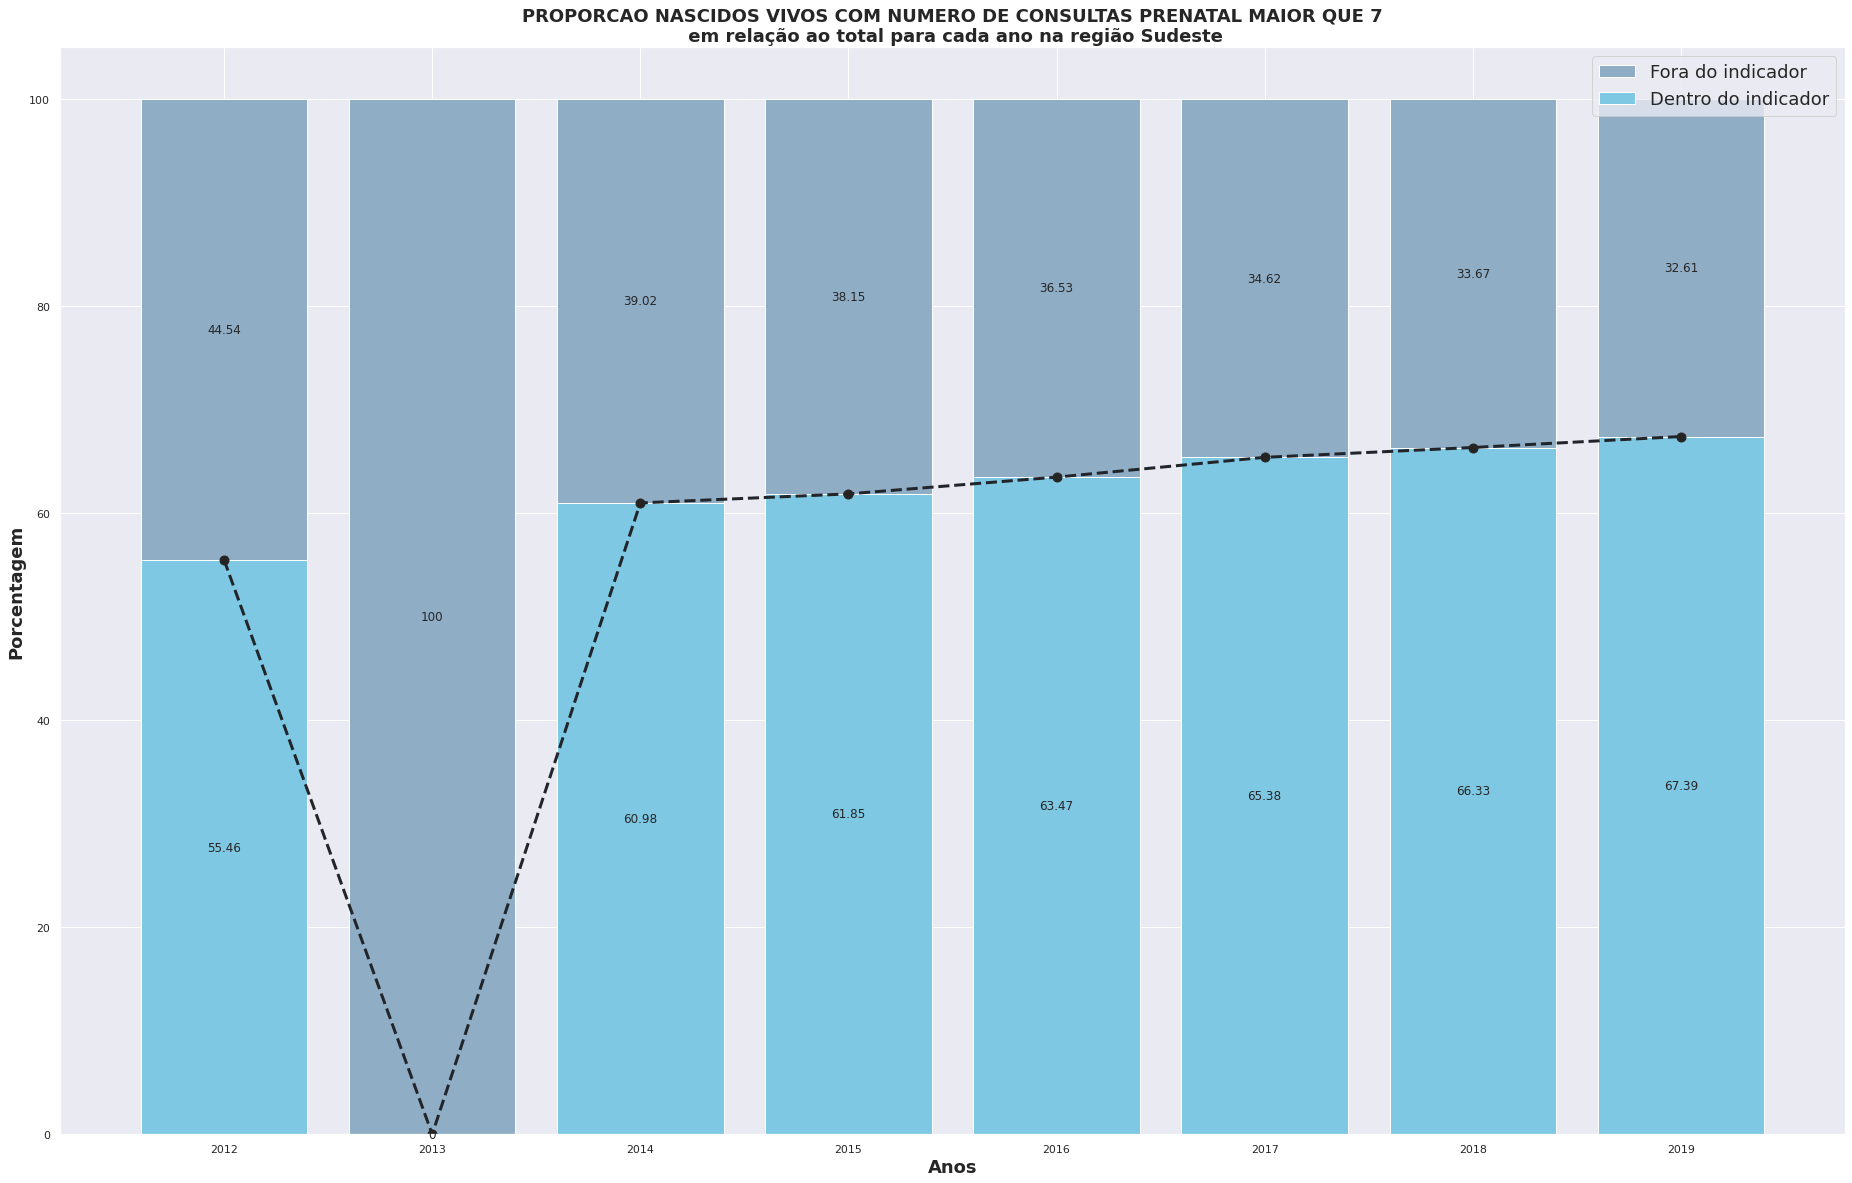

In [118]:
# Falta mostrar dentro desse gráfico a média Brasil em cada ano 

fig, ax = plt.subplots(figsize=(32, 20))

plt.plot(regiao_acumulada[ano], np.round(100*regiao_acumulada[ratio], decimals=2),'.--',markersize=18,mec='#252422',mfc='#252422',linewidth=3,color='#212529' )

p1 = ax.bar(regiao_acumulada[ano],  np.round(100 - 100*regiao_acumulada[ratio], decimals=2) , bottom= np.round(100*regiao_acumulada[ratio], decimals=2), color ='#90ADC6', label = 'Fora do indicador')
p2 = ax.bar(regiao_acumulada[ano],  np.round(100*regiao_acumulada[ratio], decimals=2), color ='#7EC8E3', label = 'Dentro do indicador' )

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.title(nome_indicador + "\n em relação ao total para cada ano na região " + nome_regiao, **font)
plt.xlabel('Anos',**font)
plt.ylabel('Porcentagem',**font)

ax.bar_label(p1,label_type="center")
ax.bar_label(p2,label_type="center")
ax.legend(loc='upper right', fontsize = 18 )

plt.savefig('./Imagens/10-grafico3', bbox_inches='tight')
plt.show()

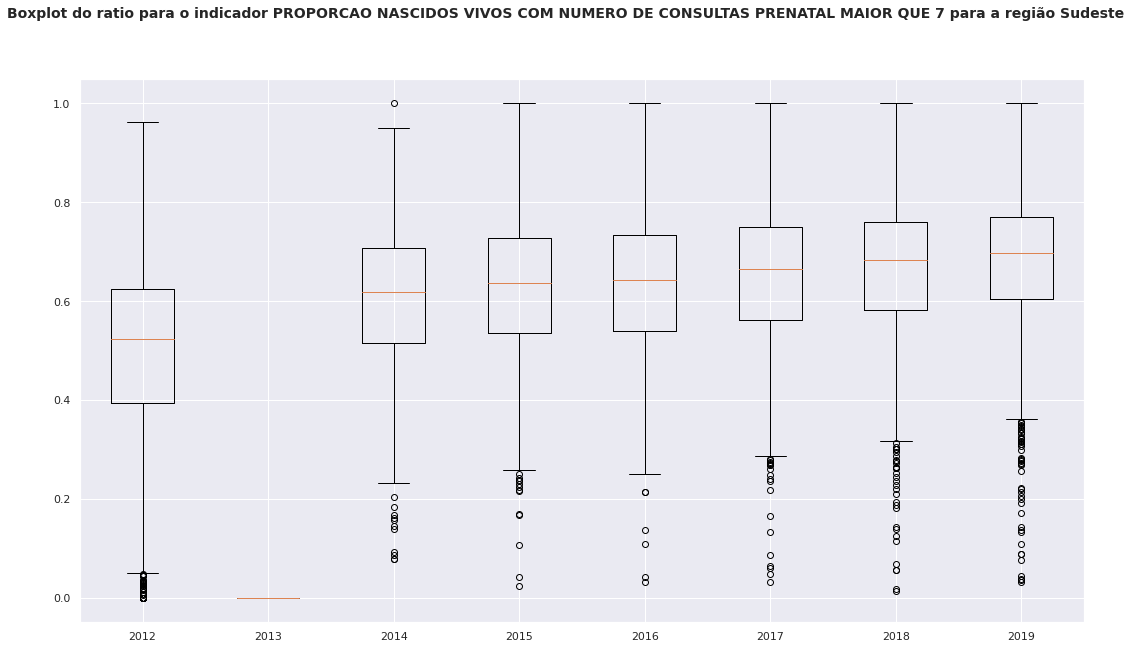

In [119]:
data_to_plot = [regiao[regiao[ano]==2012][ratio], regiao[regiao[ano]==2013][ratio],
                regiao[regiao[ano]==2014][ratio], regiao[regiao[ano]==2015][ratio],
                regiao[regiao[ano]==2016][ratio], regiao[regiao[ano]==2017][ratio],
                regiao[regiao[ano]==2018][ratio], regiao[regiao[ano]==2019][ratio]]

# Positions defaults to range(1, N+1) where N is the number of boxplot to be drawn.
# we will move them a little, to visually group them
fig = plt.figure(figsize=(18, 10))
fig.suptitle('Boxplot do ratio para o indicador ' + nome_indicador + ' para a região ' + nome_regiao , fontsize=14, fontweight='bold')

box = plt.boxplot(data_to_plot,
                  positions=[1, 2, 3, 4, 5, 6, 7, 8],
                  labels=['2012','2013','2014','2015','2016','2017','2018','2019'])

## Gráficos por estado 

### Cálculo do acumulado para cada estado e país

In [120]:
# Dataframe dos municipios do estado escolhido
df_estado_municipios = subset_nao_ignorado.loc[ subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{2})', expand=False) == str(cod_estado) ] 
print(df_estado_municipios)

      CODMUNRES  ano_nasc  Qtd_Mais_de_7_Consultas_Pre_Natal  Qtd_Total  \
25400    330010      2012                               1740       2698   
25401    330010      2013                                  0       2653   
25402    330010      2014                               1702       2838   
25403    330010      2015                               1566       2872   
25404    330010      2016                               1552       2628   
...         ...       ...                                ...        ...   
26131    330630      2015                               2302       3439   
26132    330630      2016                               2289       3364   
26133    330630      2017                               2252       3272   
26134    330630      2018                               2244       3376   
26135    330630      2019                               2092       3096   

          Ratio  
25400  0.644922  
25401  0.000000  
25402  0.599718  
25403  0.545265  
25404  0.

In [121]:
df_brasil_acumulado = acumula(subset_nao_ignorado)
print(df_brasil_acumulado)

   ano_nasc  Qtd_Mais_de_7_Consultas_Pre_Natal  Qtd_Total   Ratio
0      2012                            1348214    2905676  0.4640
1      2013                                  0    2903867  0.0000
2      2014                            1526433    2979133  0.5124
3      2015                            1593170    3017563  0.5280
4      2016                            1556559    2857704  0.5447
5      2017                            1650885    2923441  0.5647
6      2018                            1720016    2944826  0.5841
7      2019                            1711992    2849064  0.6009


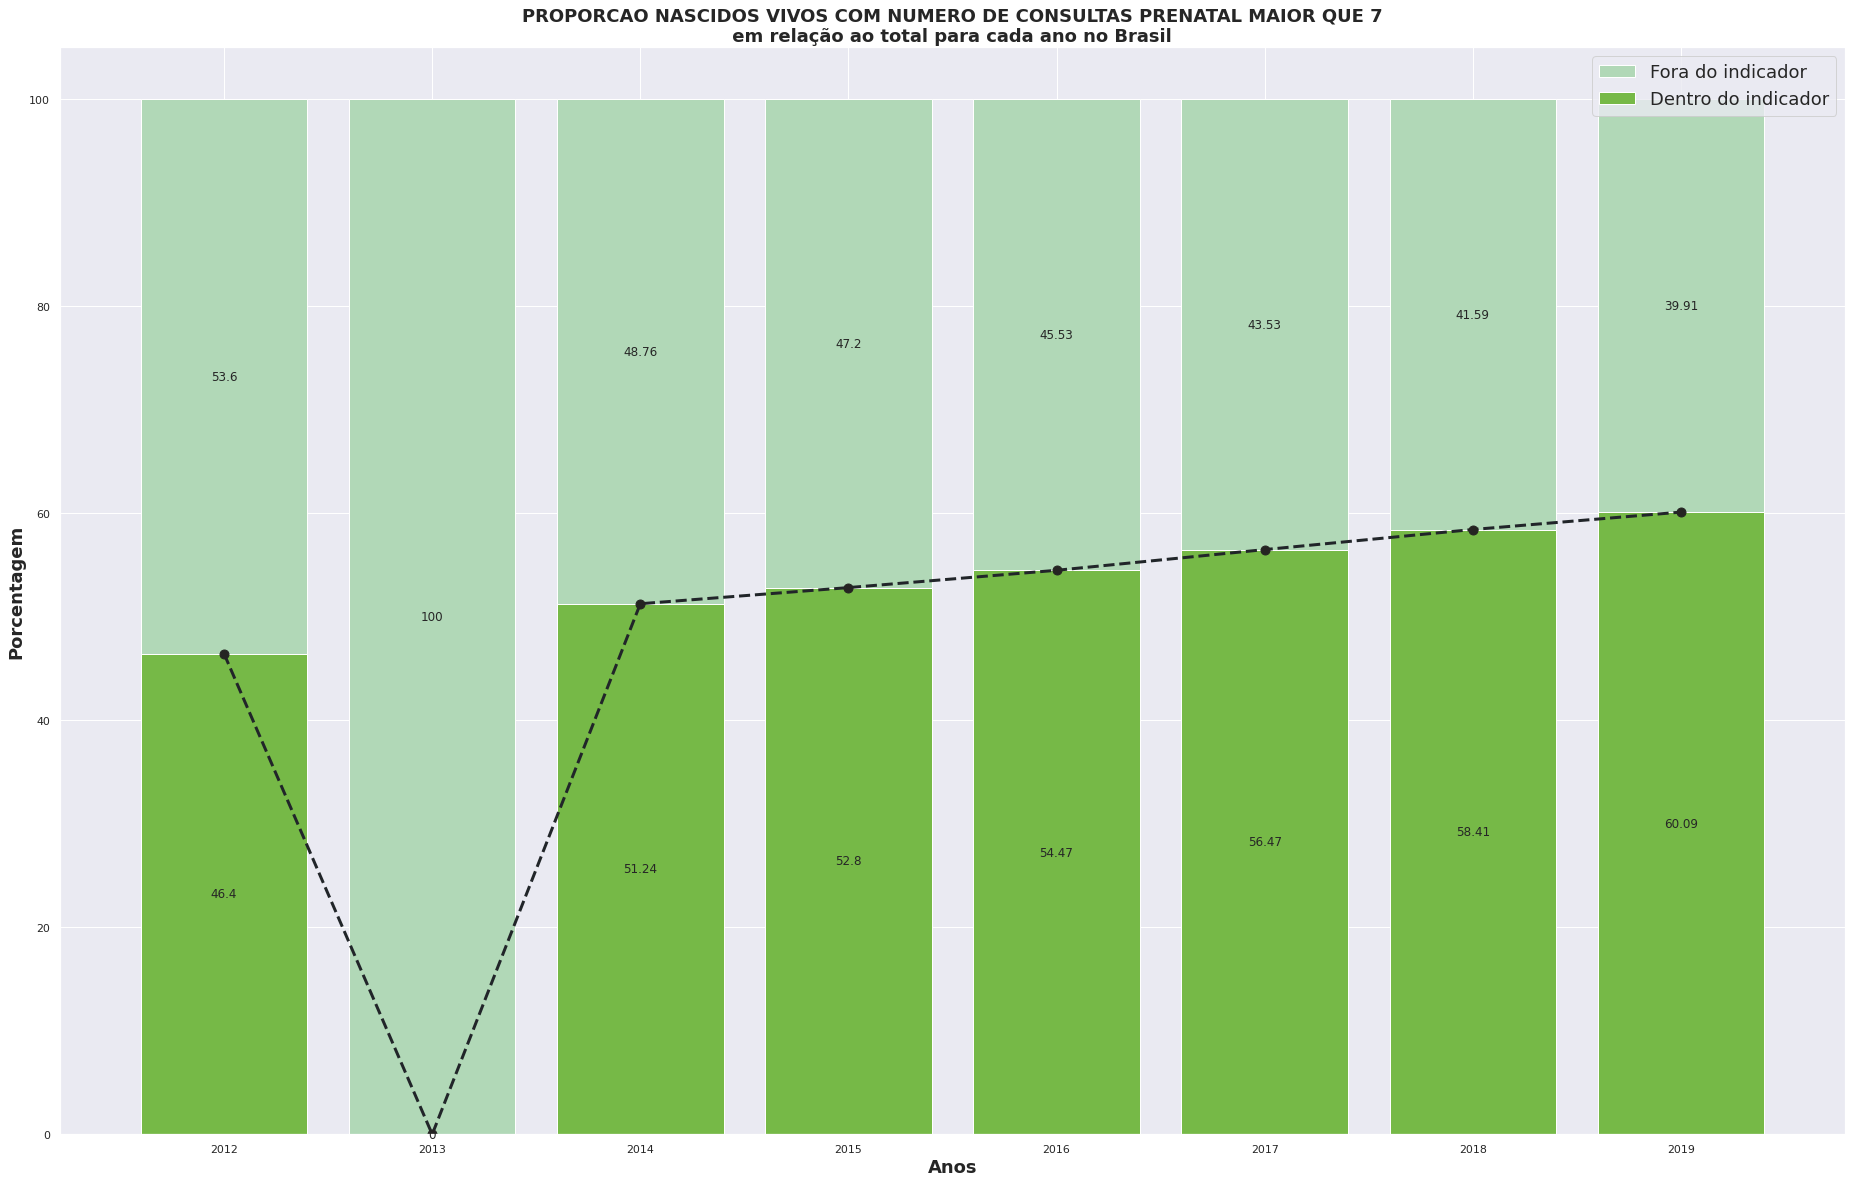

In [122]:
fig, ax = plt.subplots(figsize=(32, 20))

plt.plot(df_brasil_acumulado[ano], np.round(100*df_brasil_acumulado[ratio], decimals=2),'.--',markersize=18,mec='#252422',mfc='#252422',linewidth=3,color='#212529' )

p1 = ax.bar(df_brasil_acumulado[ano],  np.round(100 - 100*df_brasil_acumulado[ratio], decimals=2) , bottom= np.round(100*df_brasil_acumulado[ratio], decimals=2), color ='#B1D8B7', label = 'Fora do indicador')
p2 = ax.bar(df_brasil_acumulado[ano],  np.round(100*df_brasil_acumulado[ratio], decimals=2), color ='#76B947', label = 'Dentro do indicador' )

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.title(nome_indicador + "\n em relação ao total para cada ano no Brasil ", **font)
plt.xlabel('Anos',**font)
plt.ylabel('Porcentagem',**font)

ax.bar_label(p1,label_type="center")
ax.bar_label(p2,label_type="center")
ax.legend(loc='upper right', fontsize = 18 )
plt.savefig('./Imagens/10-grafico4', bbox_inches='tight')
plt.show()

In [123]:
df_brasil_por_estado = df_grouped_by_state
print(df_brasil_por_estado)

     COD_UF  ano_nasc  Qtd_Mais_de_7_Consultas_Pre_Natal  Qtd_Total     Ratio
0        11      2012                               9417      26511  0.355211
1        11      2013                                  0      27081  0.000000
2        11      2014                              10127      27556  0.367506
3        11      2015                              12223      27914  0.437881
4        11      2016                              11453      26600  0.430564
..      ...       ...                                ...        ...       ...
211      53      2015                              27927      46122  0.605503
212      53      2016                              27491      43340  0.634310
213      53      2017                              28051      44568  0.629398
214      53      2018                              28490      44195  0.644643
215      53      2019                              27999      42422  0.660011

[216 rows x 5 columns]


### Gráfico do município mostrando também as médias Brasil Estadual e Regional para cada ano

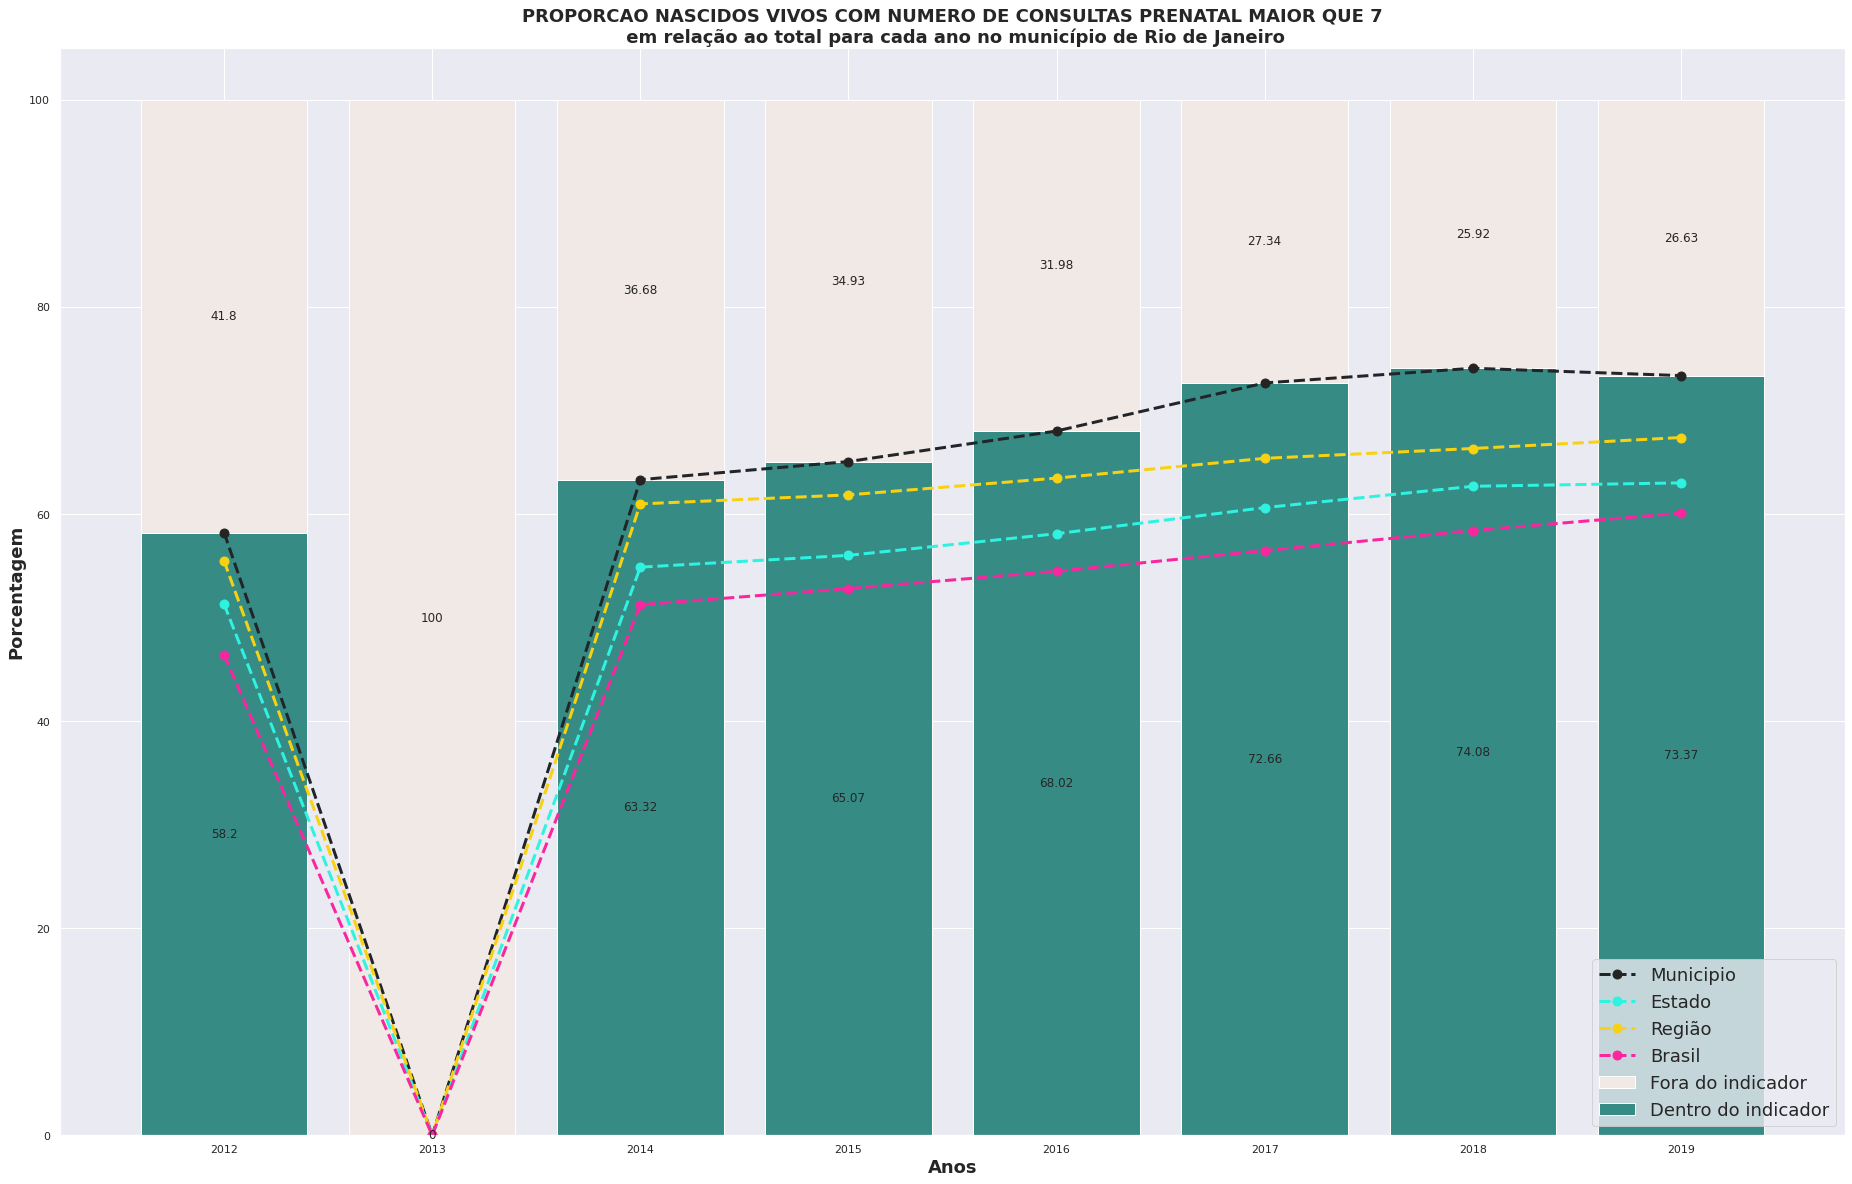

In [124]:
fig, ax = plt.subplots(figsize=(32, 20))

plt.plot(subset_mun[ano], np.round(100*subset_mun[ratio], decimals=2),'.--',markersize=18,mec='#252422',mfc='#252422',linewidth=3,color='#212529', label = 'Municipio' ) # Municipio
plt.plot(df_estado_acumulado[ano], np.round(100*df_estado_acumulado[ratio], decimals=2),'.--',markersize=18,mec='#2FF3E0',mfc='#2FF3E0',linewidth=3,color='#2FF3E0' , label = 'Estado' ) # Estado
plt.plot(regiao_acumulada[ano], np.round(100*regiao_acumulada[ratio], decimals=2),'.--',markersize=18,mec='#F8D210',mfc='#F8D210',linewidth=3,color='#F8D210' , label = 'Região' ) # Região
plt.plot(df_brasil_acumulado[ano], np.round(100*df_brasil_acumulado[ratio], decimals=2),'.--',markersize=18,mec='#FA26A0',mfc='#FA26A0',linewidth=3,color='#FA26A0', label = 'Brasil'  ) # Brasil

plt.legend(loc='upper left', fontsize = 18 )

p1 = ax.bar(subset_mun[ano],  np.round(100 - 100*subset_mun[ratio], decimals=2) , bottom= np.round(100*subset_mun[ratio], decimals=2), color ='#F1E9E5', label = 'Fora do indicador')
p2 = ax.bar(subset_mun[ano],  np.round(100*subset_mun[ratio], decimals=2), color ='#368B85', label = 'Dentro do indicador' )

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.title(nome_indicador + "\n em relação ao total para cada ano no município de " + nome_municipio, **font)
plt.xlabel('Anos',**font)
plt.ylabel('Porcentagem',**font)

'''
if(subset_mun[total].mean()<100):
    plt.text(0.03, 1.1, 'Esse município possui em média menos de 100 registros em cada ano', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
'''
ax.bar_label(p1,label_type="center")
ax.bar_label(p2,label_type="center")
ax.legend(loc='lower right', fontsize = 18 )

plt.savefig('./Imagens/10-grafico5', bbox_inches='tight')
plt.show()

### Boxplot de todos os municípios de um estado em cada ano, lado a lado

Escolhemos um indicador, então um gráfico contendo os boxplot de cada ano é gerado para um estado em específico, nesse gráfico também está contida a informação de qual é a média mediana do estado. Além de indicar em qual quartil o estado se encontra em relação ao país (vale revisar se essa informação deveria estar aqui)

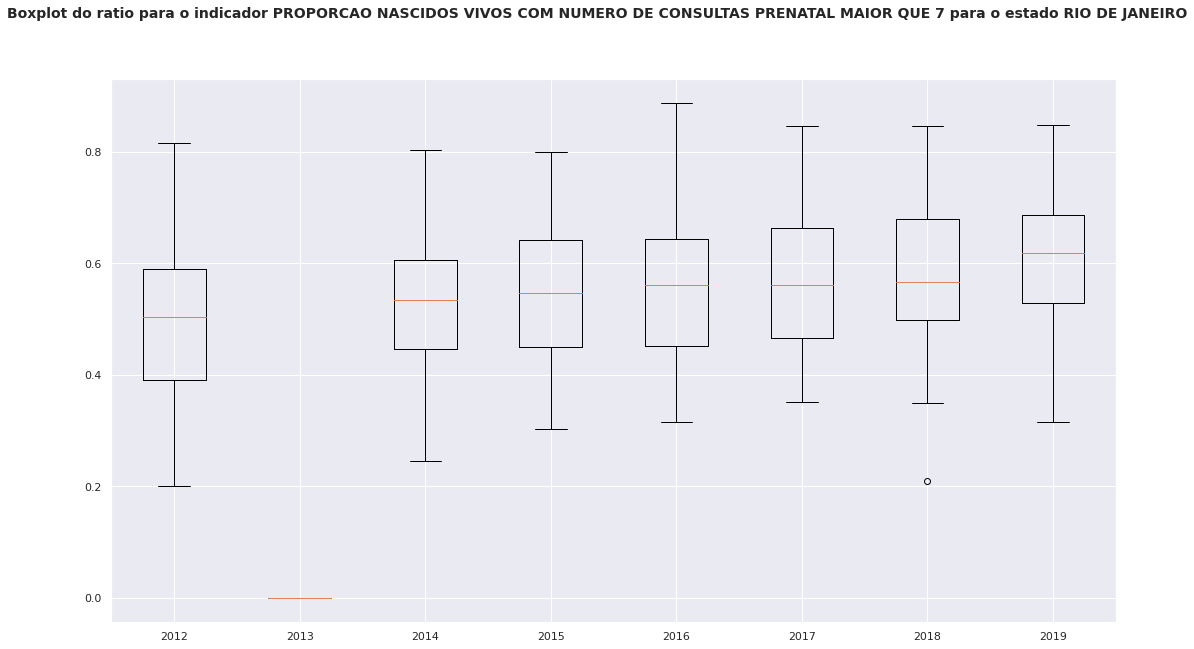

In [125]:
data_to_plot = [df_estado_municipios[df_estado_municipios[ano]==2012][ratio], df_estado_municipios[df_estado_municipios[ano]==2013][ratio],
                df_estado_municipios[df_estado_municipios[ano]==2014][ratio], df_estado_municipios[df_estado_municipios[ano]==2015][ratio],
                df_estado_municipios[df_estado_municipios[ano]==2016][ratio], df_estado_municipios[df_estado_municipios[ano]==2017][ratio],
                df_estado_municipios[df_estado_municipios[ano]==2018][ratio], df_estado_municipios[df_estado_municipios[ano]==2019][ratio]]

# Positions defaults to range(1, N+1) where N is the number of boxplot to be drawn.
# we will move them a little, to visually group them
fig = plt.figure(figsize=(18, 10))
fig.suptitle('Boxplot do ratio para o indicador ' + nome_indicador + ' para o estado ' + nome_estado , fontsize=14, fontweight='bold')

box = plt.boxplot(data_to_plot,
                  positions=[1, 2, 3, 4, 5, 6, 7, 8],
                  labels=['2012','2013','2014','2015','2016','2017','2018','2019'])

### Gráfico em barras do acumulado de cada estado em um ano, com cada estado lado a lado

In [126]:
subset_ano = subset_nao_ignorado[ subset_nao_ignorado[ano] == ano_esc ]
subset_ano.head()

,CODMUNRES,ano_nasc,Qtd_Mais_de_7_Consultas_Pre_Natal,Qtd_Total,Ratio
4,110001,2016,147,326,0.450920
12,110037,2016,98,168,0.583333
20,110040,2016,30,220,0.136364
28,110034,2016,79,166,0.475904
36,110002,2016,111,1662,0.066787


In [127]:
df_brasil_por_estado
df_brasil_por_estado_e_ano = df_brasil_por_estado[df_brasil_por_estado[ano]==ano_esc]
df_brasil_por_estado_e_ano.head(10)

,COD_UF,ano_nasc,Qtd_Mais_de_7_Consultas_Pre_Natal,Qtd_Total,Ratio
4,11,2016,11453,26600,0.430564
12,12,2016,4940,15773,0.313193
20,13,2016,24885,76678,0.324539
28,14,2016,3710,11375,0.326154
36,15,2016,45018,137679,0.326978
44,16,2016,4344,15521,0.279879
52,17,2016,11414,23869,0.478193
60,21,2016,29190,110489,0.264189
68,22,2016,20735,46986,0.441302
76,23,2016,64001,126245,0.506959


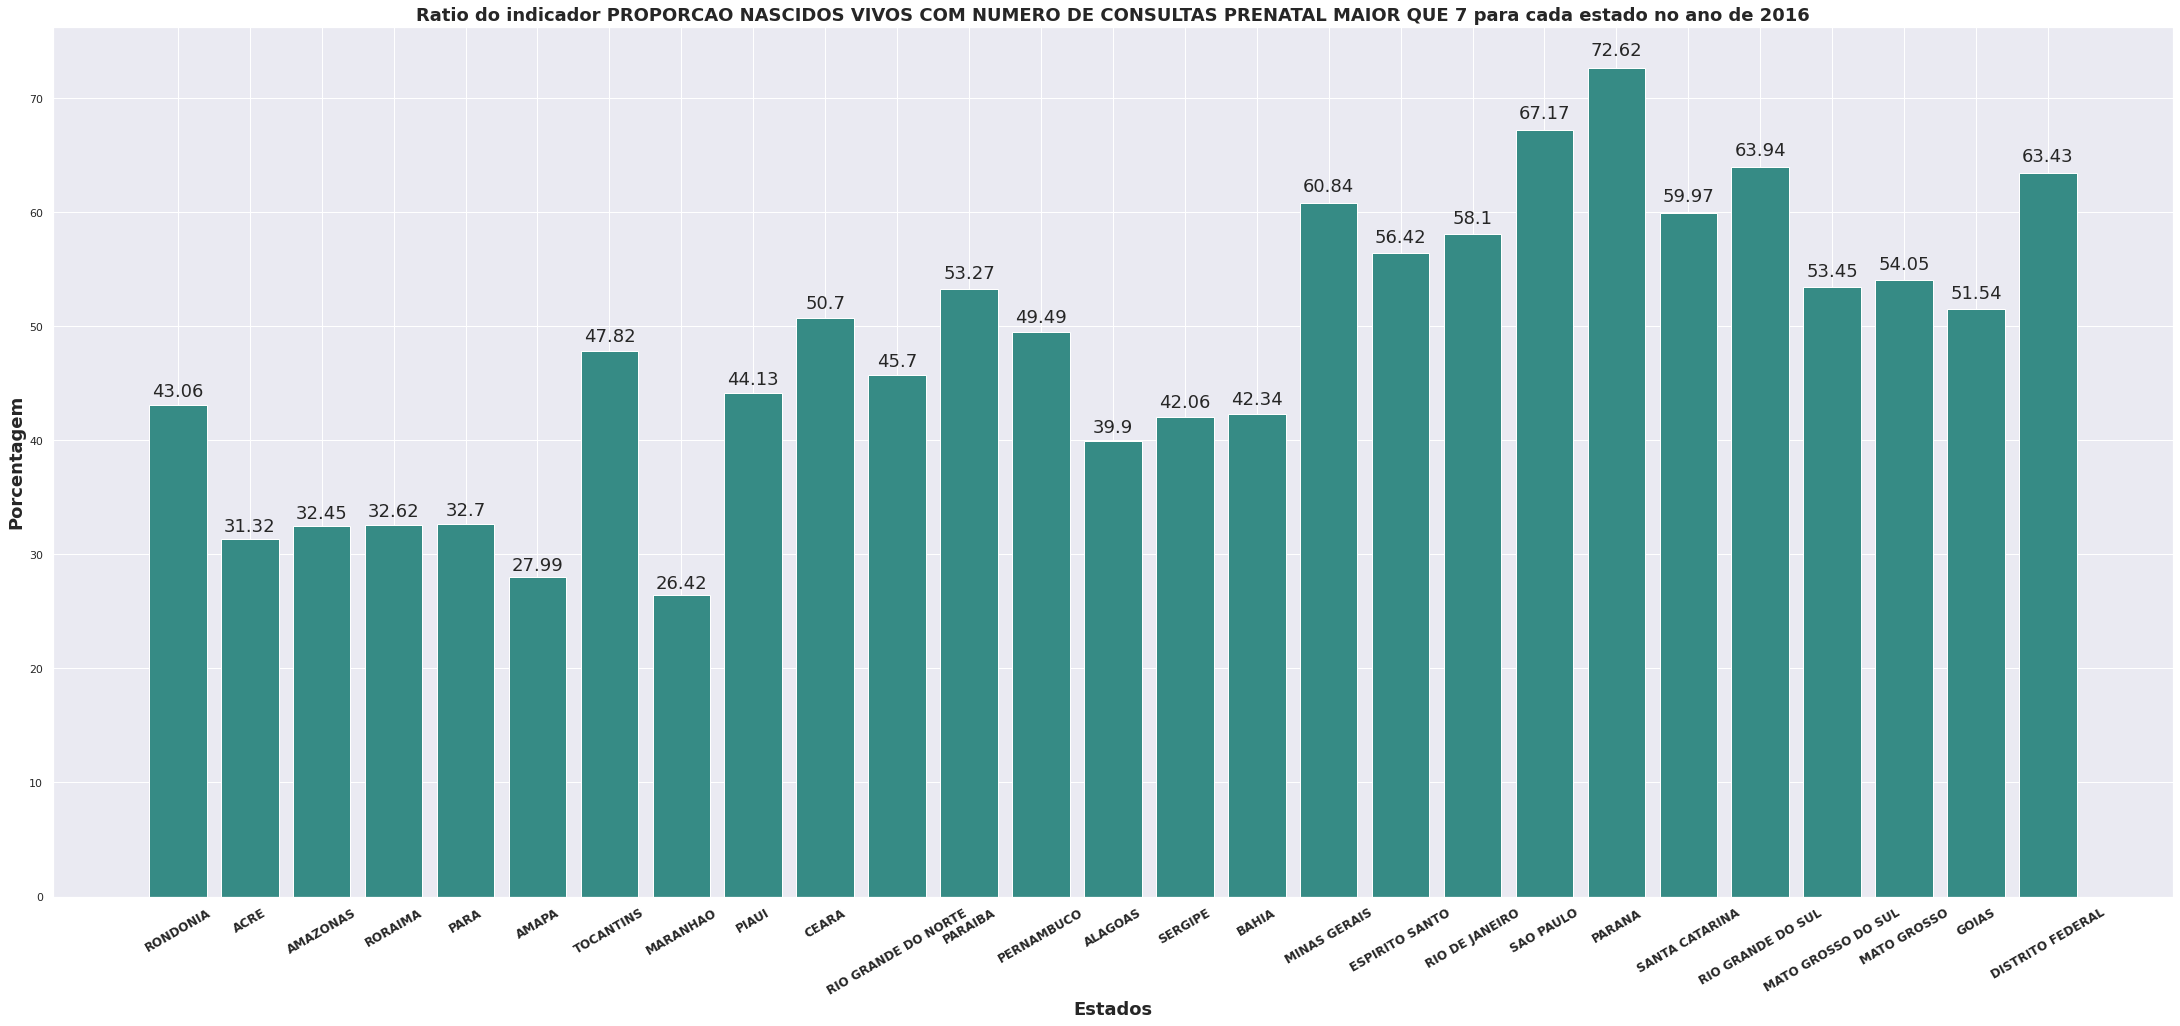

In [128]:
estados = df_estados['res_NOME_UF'].values

plt.figure(figsize=(38, 16))

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

font_label = {'family' : 'DejaVu Sans',
              'weight' : 'bold',
              'size'   : 12}


plt.title("Ratio do indicador " + nome_indicador +" para cada estado no ano de " + str(ano_esc),**font)
plt.xlabel('Estados',**font)
plt.ylabel('Porcentagem',**font)


#plt.bar(df_brasil_por_estado['COD_UF'],100*df_brasil_por_estado[df_brasil_por_estado[ano]==ano_esc]['ratio'], color ='#3458FF') #TODO
#plt.show()
estado_ = df_estados["res_NOME_UF"].values
merge1 = pd.merge(df_brasil_por_estado_e_ano, df_estados ,on=["COD_UF"])
#print(merge1.head(27))
y_pos = range(27)
grafico = plt.bar(merge1['res_NOME_UF'],100*merge1[ratio] , color ='#368B85')
for i in grafico:
    height = i.get_height()
    plt.text(i.get_x() + i.get_width()/2., 1.01*height,  round(height, 2), ha='center', va='bottom',fontsize=18)

plt.xticks(y_pos, merge1['res_NOME_UF'], rotation=30,**font_label)

plt.savefig('./Imagens/10-grafico6', bbox_inches='tight')
plt.show()

### Gerar um gráfico semelhante ao acima, porém com as regiões lado a lado

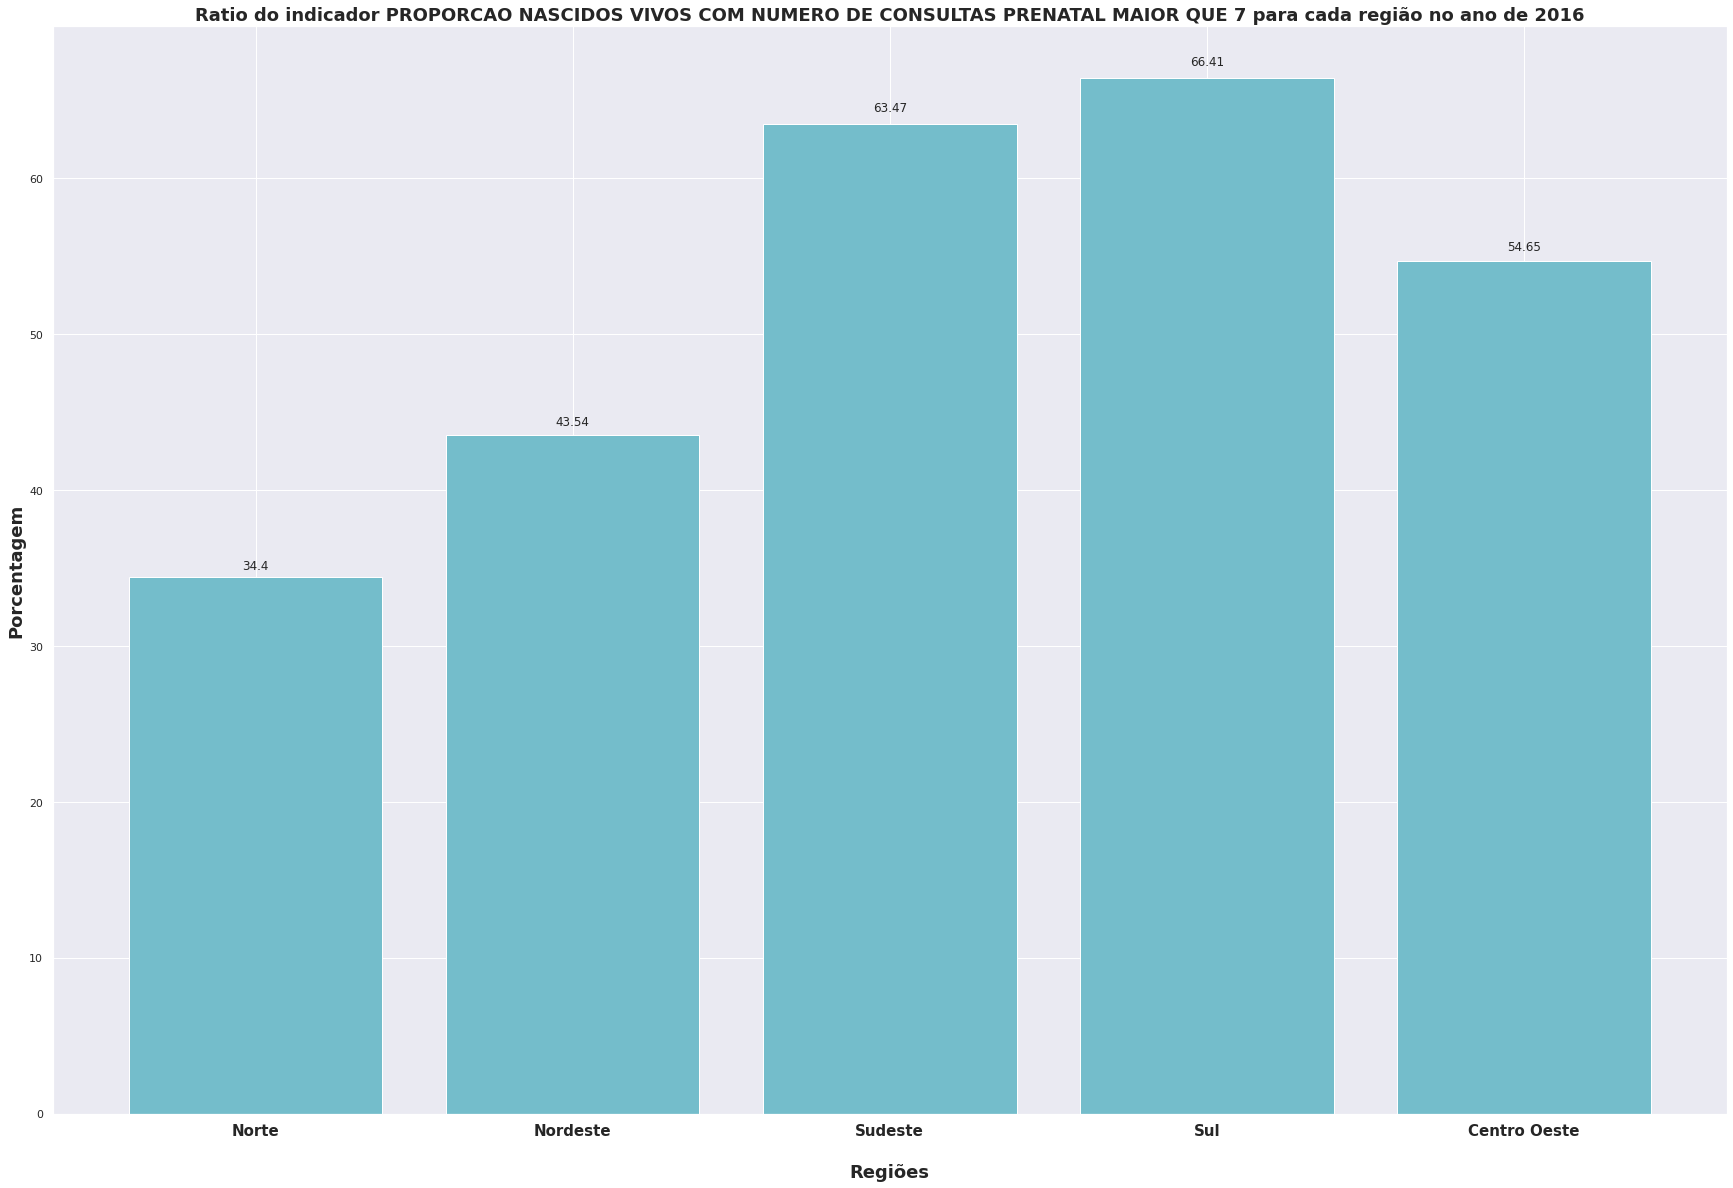

In [129]:
plt.figure(figsize=(30, 20))

aux = df_brasil_regiao[df_brasil_regiao[ano]==ano_esc]

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

font_label = {'family' : 'DejaVu Sans',
              'weight' : 'bold',
              'size'   : 15}


plt.title("Ratio do indicador " + nome_indicador +" para cada região no ano de " + str(ano_esc),**font)
plt.xlabel('\nRegiões',**font)
plt.ylabel('Porcentagem',**font)

y_pos = range(5)
grafico = plt.bar(aux['NOMEREGIAO'],100*aux[ratio] , color ='#74BDCB')
for i in grafico:
    height = i.get_height()
    plt.text(i.get_x() + i.get_width()/2., 1.01*height,  round(height, 2), ha='center', va='bottom')

plt.xticks(y_pos, aux['NOMEREGIAO'], rotation=0,**font_label)

plt.savefig('./Imagens/10-grafico7', bbox_inches='tight')
plt.show()

No handles with labels found to put in legend.


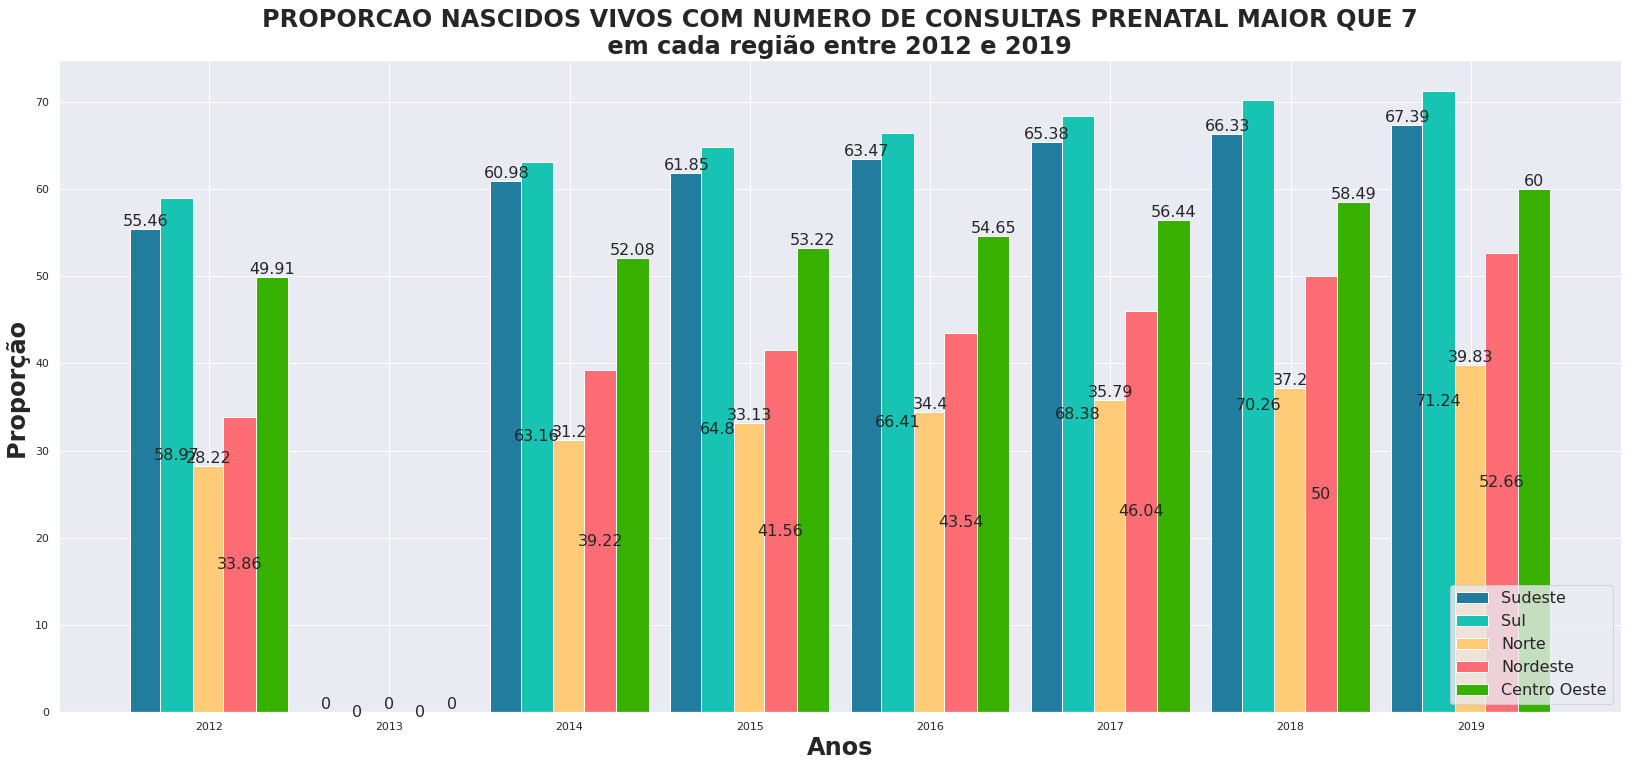

In [130]:
fig, ax = plt.subplots(figsize=(28, 12))

plt.rcParams.update({'font.size': 28})
'''
plt.plot(subset_mun[ano], np.round(subset_mun[ratio], decimals=2),'.--',markersize=18,mec='#252422',mfc='#252422',linewidth=3,color='#212529', label = 'Municipio' ) # Municipio
plt.plot(df_estado_acumulado[ano], np.round(df_estado_acumulado[ratio], decimals=2),'.--',markersize=18,mec='#2FF3E0',mfc='#2FF3E0',linewidth=3,color='#2FF3E0' , label = 'Estado' ) # Estado
plt.plot(regiao_acumulada[ano], np.round(regiao_acumulada[ratio], decimals=2),'.--',markersize=18,mec='#F8D210',mfc='#F8D210',linewidth=3,color='#F8D210' , label = 'Região' ) # Região
plt.plot(df_brasil_acumulado[ano], np.round(df_brasil_acumulado[ratio], decimals=2),'.--',markersize=18,mec='#FA26A0',mfc='#FA26A0',linewidth=3,color='#FA26A0', label = 'Brasil'  ) # Brasil
'''

plt.legend(loc='upper left', fontsize = 18 )

p1 = ax.bar(subset_mun[ano]-0.35,  np.round(100*sudeste_acumulado[ratio], decimals=2), color ='#227c9d', label = 'Sudeste',width=0.18  )
p2 = ax.bar(subset_mun[ano]-0.18,  np.round(100*sul_acumulado[ratio], decimals=2), color ='#17c3b2', label = 'Sul',width=0.18  )
p3 = ax.bar(subset_mun[ano],       np.round(100*norte_acumulado[ratio], decimals=2), color ='#ffcb77', label = 'Norte',width=0.18  )
p4 = ax.bar(subset_mun[ano]+0.17,  np.round(100*nordeste_acumulado[ratio], decimals=2) , color ='#fe6d73', label = 'Nordeste',width=0.18 )
p5 = ax.bar(subset_mun[ano]+0.35,  np.round(100*centro_oeste_acumulado[ratio], decimals=2) , color ='#38b000', label = 'Centro Oeste',width=0.18 )
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 24}

font_n = {'family' : 'DejaVu Sans',
        #'weight' : 'bold',
        'size'   : 16}



plt.title(nome_indicador + "\n em cada região entre 2012 e 2019 " , **font)
plt.xlabel('Anos',**font)
plt.ylabel('Proporção ',**font)

#if(subset_mun[total].mean()<100):
 #   plt.text(0.03, 1.1, 'Esse município possui em média menos de 100 registros em cada ano', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

ax.bar_label(p1,label_type="edge",**font_n)
ax.bar_label(p2,label_type="center",**font_n)
ax.bar_label(p3,label_type="edge",**font_n)
ax.bar_label(p4,label_type="center",**font_n)
ax.bar_label(p5,label_type="edge",**font_n)

ax.legend(loc='lower right', fontsize = 16 )

plt.savefig('./Imagens/121-grafico-regioes', bbox_inches='tight')
plt.show()

# Refazer as médias

In [45]:
#Mediana e quartil 
df_para_data_selecionada = df_brasil_por_estado[df_brasil_por_estado[ano] ==  ano_esc]

Media_total = df_para_data_selecionada[total].mean()
Mediana_total = df_para_data_selecionada[total].median()

#0.25 1st quartile(lower), 0.5 2nd quartile or median(mid), 0.75 3rd quartile(upper)
Quartil_total = df_para_data_selecionada[indicador].quantile([0.25,0.5,0.75])

Media_indicador = df_para_data_selecionada[indicador].mean()
Mediana_indicador = df_para_data_selecionada[indicador].median()

#0.25 1st quartile(lower), 0.5 2nd quartile or median(mid), 0.75 3rd quartile(upper)
Quartil_indicador = df_para_data_selecionada[indicador].quantile([0.25,0.5,0.75])

#print(df_brasil_por_estado)
print()
print("Media estadual do número total de registros feitos nesse ano (" ,ano_esc,"), no Brasil: ", float(Media_total))
print("Mediana do total de registros feitos nesse ano (" ,ano_esc,"), entre os estados do Brasil: ", float(Mediana_total))
print("Quartis do total de registros feitos nesse ano (" ,ano_esc,"), entre os estados do Brasil:\n",Quartil_total)
#------------------------------------------------
print()
print("Media estadual do número de registros dentro do indicador", nome_indicador," feito nesse ano (", ano_esc, ") no Brasil: ", float(Media_indicador))
print("Mediana do número de registros dentro do indicador", nome_indicador," feito nesse ano (", ano_esc, ") entre os estados do Brasil: ", float(Mediana_indicador))
print("Quartis do número de registros dentro do indicador", nome_indicador," feito nesse ano (", ano_esc, ") entre os estados do Brasil:\n",Quartil_indicador)
print()
print('Dataframe agrupado por estado no ano de ',ano_esc,'\n')
print(df_para_data_selecionada)


Media estadual do número total de registros feitos nesse ano ( 2016 ), no Brasil:  2381919.888888889
Mediana do total de registros feitos nesse ano ( 2016 ), entre os estados do Brasil:  1265276.0
Quartis do total de registros feitos nesse ano ( 2016 ), entre os estados do Brasil:
 0.25     42875.5
0.50     56078.0
0.75    134187.0
Name: Qtd_Total, dtype: float64

Media estadual do número de registros dentro do indicador TAXA FECUNDIDADE TOTAL  feito nesse ano ( 2016 ) no Brasil:  105826.92592592593
Mediana do número de registros dentro do indicador TAXA FECUNDIDADE TOTAL  feito nesse ano ( 2016 ) entre os estados do Brasil:  56078.0
Quartis do número de registros dentro do indicador TAXA FECUNDIDADE TOTAL  feito nesse ano ( 2016 ) entre os estados do Brasil:
 0.25     42875.5
0.50     56078.0
0.75    134187.0
Name: Qtd_Total, dtype: float64

Dataframe agrupado por estado no ano de  2016 

     COD_UF   Ano  Qtd_Total       Pop     Ratio
4        11  2016      26597    561757  0.04734

In [173]:
#média de município do país inteiro: numero total de registros em um ano no brasil / numero total de municípios que foram contabilizados no pais
df_aux=df_brasil_acumulado[df_brasil_acumulado[ano]==ano_esc]
media_total_mun_pais=df_aux[total]/numero_municipios_pais # tem que revisar isso, pq o numero de municipios considerados é diferente para cada ano
print("Media municipal do número de total de registros feito nesse ano (", ano_esc, ") no Brasil: ", float(media_total_mun_pais))

df_aux=df_brasil_acumulado[df_brasil_acumulado[ano]==ano_esc]
media_indicador_mun_pais=df_aux[indicador]/numero_municipios_pais # tem que revisar isso, pq o numero de municipios considerados é diferente para cada ano
print("Media municipal do número de registros dentro do indicador", nome_indicador," feito nesse ano (", ano_esc, ") no Brasil: ",  float(media_indicador_mun_pais))

NameError: name 'numero_municipios_pais' is not defined

In [174]:
#média de município do estado: numero total de registros em um ano no estado / numero total de municípios que foram contabilizados no estado
#média de município do país inteiro: numero total de registros em um ano no brasil / numero total de municípios que foram contabilizados no pais
df_aux=df_estado_acumulado[df_estado_acumulado[ano]==ano_esc]
media_total_mun_pais=df_aux[total]/numero_municipios_estado # tem que revisar isso, pq o numero de municipios considerados é diferente para cada ano
print("Media municipal do número de total de registros feito nesse ano (", ano_esc, ") no estado", nome_estado, ": ", float(media_total_mun_pais))

df_aux=df_brasil_acumulado[df_brasil_acumulado[ano]==ano_esc]
media_indicador_mun_pais=df_aux[indicador]/numero_municipios_estado # tem que revisar isso, pq o numero de municipios considerados é diferente para cada ano
print("Media municipal do número de registros dentro do indicador", nome_indicador," feito nesse ano (", ano_esc, ") no estado", nome_estado, ": ",  float(media_indicador_mun_pais))


Media municipal do número de total de registros feito nesse ano ( 2019 ) no estado RIO DE JANEIRO :  2260.5
Media municipal do número de registros dentro do indicador RAZAO MORTALIDADE MATERNA DIRETA BRASIL  feito nesse ano ( 2019 ) no estado RIO DE JANEIRO :  11.282608695652174


In [304]:
# Médias regionais

## Describe por Estado

Dados do país inteiro considerando as proporções de cada estado (em todos os anos)

In [175]:
df_aux = df_brasil_por_estado[['COD_UF', 'Ratio']]
df_to_describe = df_aux.groupby(['COD_UF']).mean()
#df_to_describe.sort_values('Ratio',ascending=False)
aux = df_to_describe.describe()
df_to_describe['Ratio'].quantile([0.25,0.5,0.75])
aux

,Ratio
count,27.000000
mean,0.000421
std,0.000111
min,0.000215
25%,0.000356
50%,0.000426
75%,0.000443
max,0.000678


In [176]:
df_to_describe

,Ratio
COD_UF,
11,0.000431
12,0.000430
13,0.000497
14,0.000501
15,0.000595
16,0.000600
17,0.000427
21,0.000678
22,0.000606


## Describe por Município

Dados do país inteiro considerando as proporções de cada município (em todos os anos)

In [102]:
df_aux = subset_nao_ignorado[['CODMUNRES', 'Ratio']]
df_to_describe = df_aux.groupby(['CODMUNRES']).mean()
df_to_describe.describe()

,Ratio
count,5570.000000
mean,0.377795
std,0.256673
min,0.000000
25%,0.174540
50%,0.335565
75%,0.553026
max,1.000000


## Describe No Estado

Dados do estado escolhido (Rio de Janeiro) considerando as proporções de cada município (em todos os anos)


In [1863]:
df_aux = df_estado_municipios[['CODMUNRES', 'Ratio']]
df_to_describe = df_aux.groupby(['CODMUNRES']).mean()
descricao = df_to_describe.describe()
print(descricao)
print(descricao.at['25%','Ratio'])

#len_25 = len(df_estado_municipios[df_estado_municipios[ratio]<= ])

           Ratio
count  92.000000
mean    0.568746
std     0.122096
min     0.301044
25%     0.490306
50%     0.569489
75%     0.638572
max     0.838296
0.4903064131515108


## Gráfico de Pizza para visualizar a proporção de municípios e estados em cada quartil (vamos ver os quartis do país e do estado) além de indicar em qual quartil o município e estado escolhido se encontram

In [1864]:
# '330455'
df_to_describe

,Ratio
CODMUNRES,
330010,0.521980
330015,0.362003
330020,0.660029
330022,0.555678
330023,0.583531
330025,0.540441
330030,0.613840
330040,0.528183
330045,0.794408


In [1865]:
df_estado_municipios

,CODMUNRES,ano_nasc,Qtd_2ou4Racacor,Qtd_Total,Ratio
25495,330010,2012,1246,2698,0.461824
25496,330010,2013,1054,2653,0.397286
25497,330010,2014,1374,2838,0.484144
25498,330010,2015,1514,2872,0.527159
25499,330010,2016,1422,2628,0.541096
...,...,...,...,...,...
26226,330630,2015,1503,3439,0.437046
26227,330630,2016,1392,3364,0.413793
26228,330630,2017,1454,3272,0.444377
26229,330630,2018,1458,3376,0.431872


In [1866]:
len_25 = len(df_to_describe[df_to_describe[ratio]<= descricao.at['25%','Ratio']])
len_50 = len(df_to_describe[df_to_describe[ratio]<= descricao.at['25%','Ratio']])
len_75 = len(df_to_describe[df_to_describe[ratio]>= descricao.at['75%','Ratio']])

len_75

23